In [1]:
from matplotlib import pyplot as plt
import numpy as np
import numba

In [2]:
@numba.guvectorize([numba.void(numba.float64[:,:], numba.uint16, numba.uint16[:])], 
                   '(a,b),()->(a)', target='parallel', nopython=True)
def mandelbrot(c,maxiter,res):
    for i in range(c.shape[0]):
        creal,cimag,cjmag,ckmag = c[i]
        real, imag, jmag, kmag  = 0, 0, 0, 0
        nreal,nimag,njmag,nkmag  = 0, 0, 0, 0
        for n in range(1,maxiter):
            real=nreal*nreal - nimag*nimag - njmag*njmag - nkmag*nkmag + creal
            imag=2*nreal*nimag + cimag
            jmag=2*nreal*njmag + cjmag
            kmag=2*nreal*nkmag + ckmag
            nreal,nimag,njmag,nkmag = real,imag,jmag,kmag
            if real * real + imag * imag + jmag * jmag + kmag * kmag > 4.0:
                res[i] = n
                break
        else:
            res[i] = 0

def shittymandelbrot(c,maxiter):
    res = []
    for i in range(c.shape[0]):
        creal,cimag,cjmag,ckmag = c[i]
        real, imag, jmag, kmag  = 0, 0, 0, 0
        nreal,nimag,njmag,nkmag  = 0, 0, 0, 0
        for n in range(1,maxiter):
            real=nreal*nreal - nimag*nimag - njmag*njmag - nkmag*nkmag + creal
            imag=2*nreal*nimag + cimag
            jmag=2*nreal*njmag + cjmag
            kmag=2*nreal*nkmag + ckmag
            nreal,nimag,njmag,nkmag = real,imag,jmag,kmag
            if real * real + imag * imag + jmag * jmag + kmag * kmag > 4.0:
                res.append(n)
                break
        else:
            res.append(0)
    return res

In [3]:
def fastrijk():
    return numba.float64(np.array(
        [[-2+r/100, -1+i/100, -1+j/100, 0] 
         for r in range(301) for i in range(201) for j in range(201)]
    ))

#Format is [rmn, rmx, rsc]
def slowrijk(rpar,ipar=[],jpar=[],kpar=[]):
    rmn, rmx, rsc = rpar
    if len(ipar) == 0: imn,imx,isc = 0, 0, 1
    elif len(ipar) == 1: imn,imx,isc = ipar[0], ipar[0], 1
    else: imn, imx, isc = ipar
    if len(jpar) == 0: jmn,jmx,jsc = 0, 0, 1
    elif len(jpar) == 1: jmn,jmx,jsc = jpar[0], jpar[0], 1
    else: jmn, jmx, jsc = jpar
    if len(kpar) == 0: kmn,kmx,ksc = 0, 0, 1
    elif len(kpar) == 1: kmn,kmx,ksc = kpar[0], kpar[0], 1
    else: kmn, kmx, ksc = kpar
    rijk = numba.float64(np.array(
        [[rmn+r*(rmx-rmn)/rsc,imn+i*(imx-imn)/isc,jmn+j*(jmx-jmn)/jsc,kmn+k*(kmx-kmn)/ksc] 
         for r in range(rsc+1) for i in range(isc+1) for j in range(jsc+1) for k in range(ksc+1)]
    ))
    return rijk
        

In [4]:
def plotRijk(rijk, data, axis='ri'):
    swap = np.swapaxes(rijk,0,1)
    dct = {'r':0, 'i':1, 'j':2, 'k':3}
    assert len(axis) in [2,3]
    points = np.array([swap[dct[i]] for i in axis])
    return points

In [5]:
@numba.guvectorize([numba.void(numba.int32[:], numba.int32[:], numba.float64[:,:])], 
                   '(a),(b)->(a,b)', target='parallel', nopython=True)
def colourmap(inp, hi, res):
    mx = np.max(inp)
    for i in range(len(inp)):
        if inp[i] != 0:
            res[i] = (1.,1-(inp[i]/mx)**.5,1-(inp[i]/mx)**.5)
        else:
            res[i] = (1,1,1)

In [71]:
rj = rijk([-.1,.1,20],[-1,1,200],[-1,1,200],[0])
itrs = mandelbrot(rj, 100)

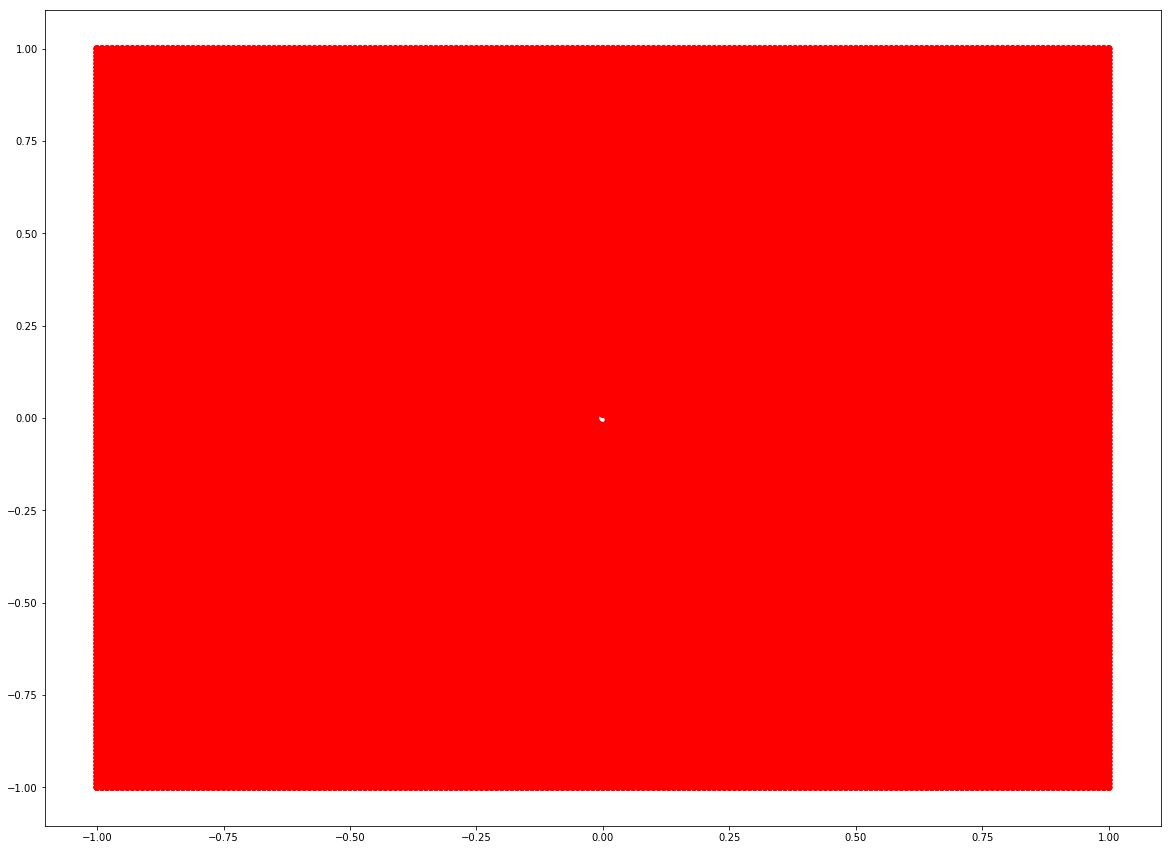

Real =  -2.0


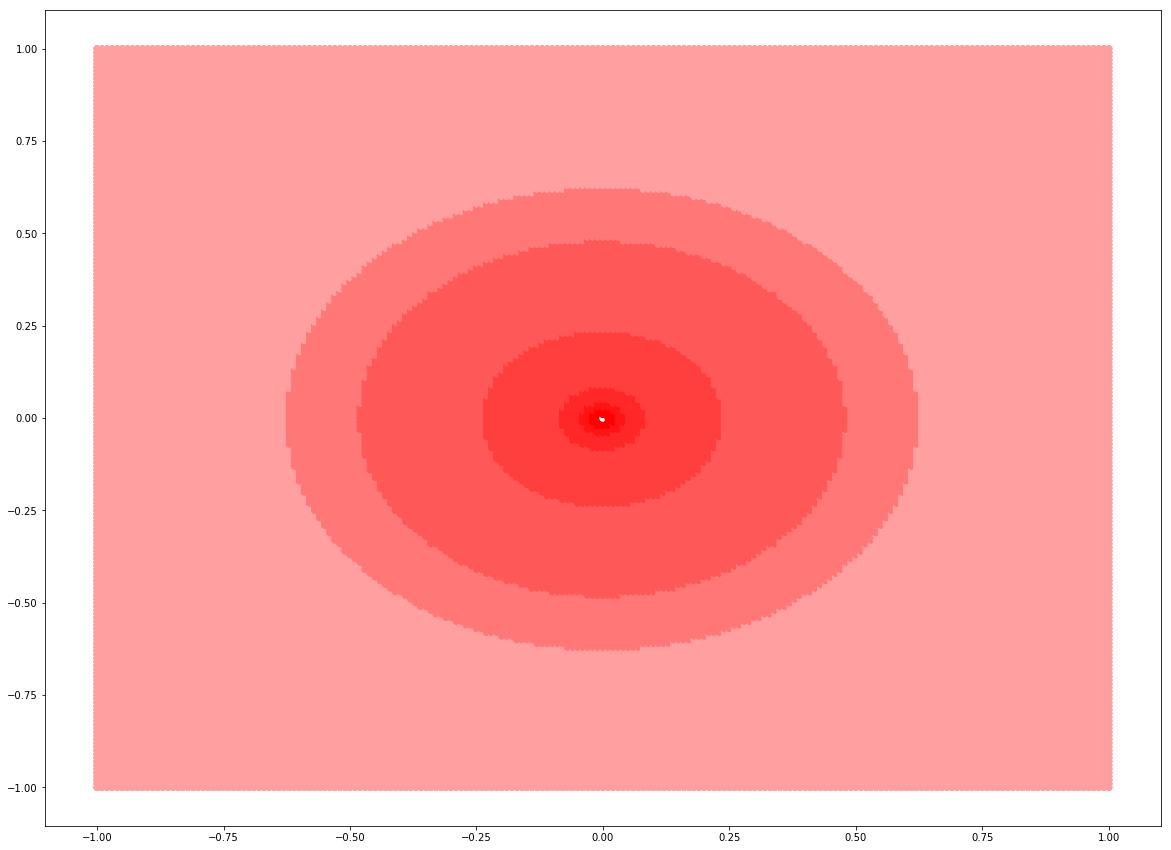

Real =  -1.9


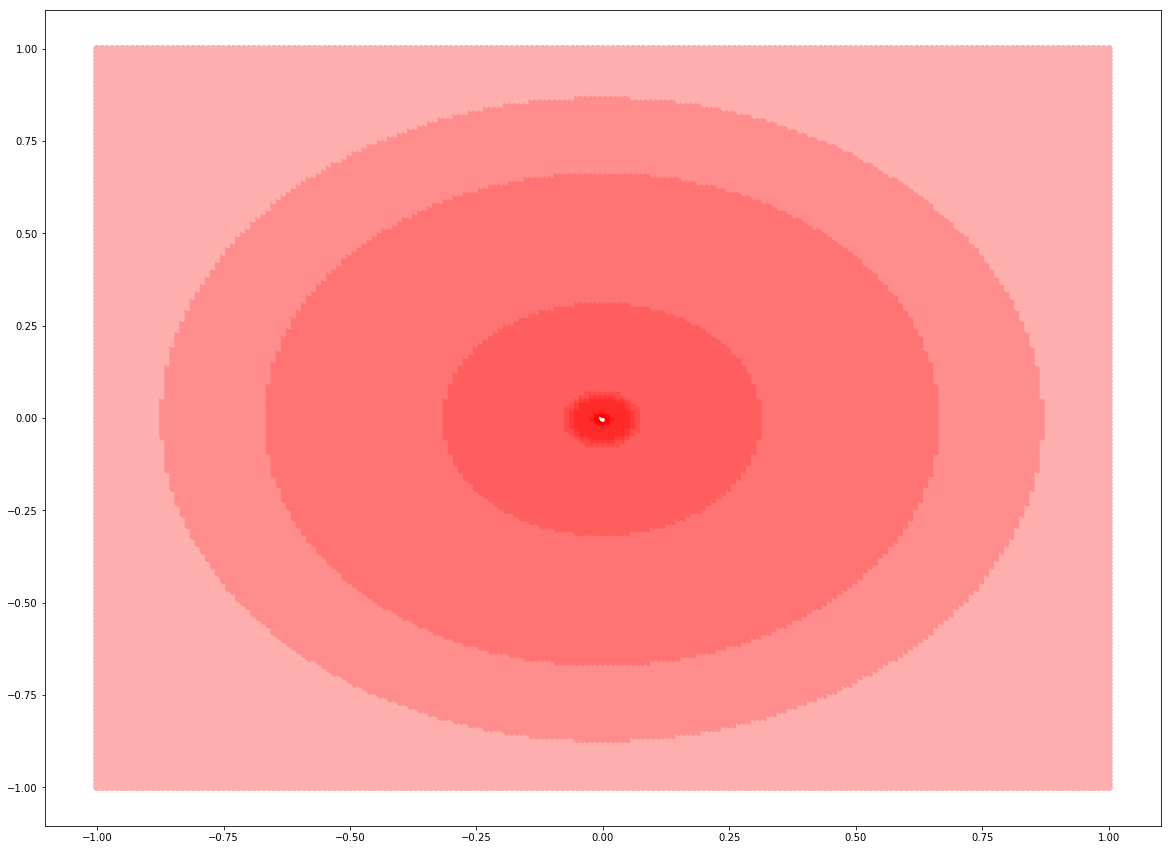

Real =  -1.8


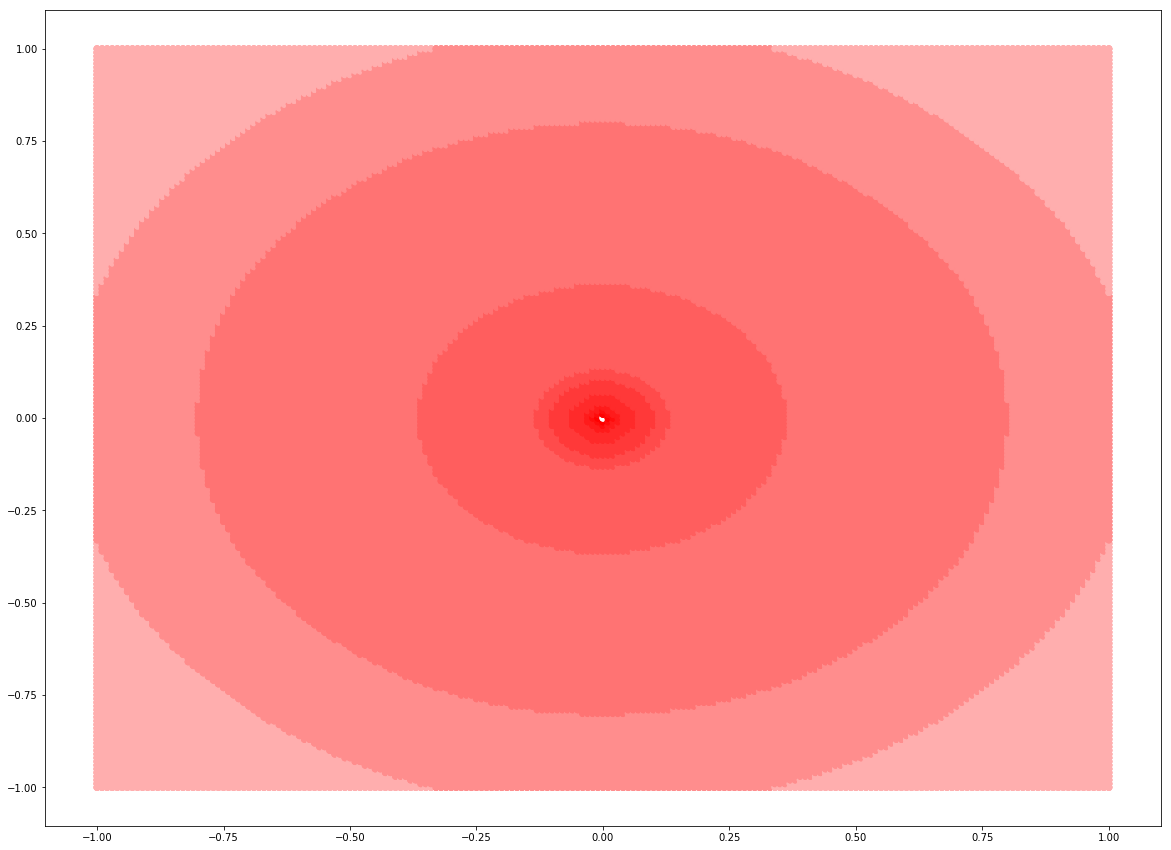

Real =  -1.7


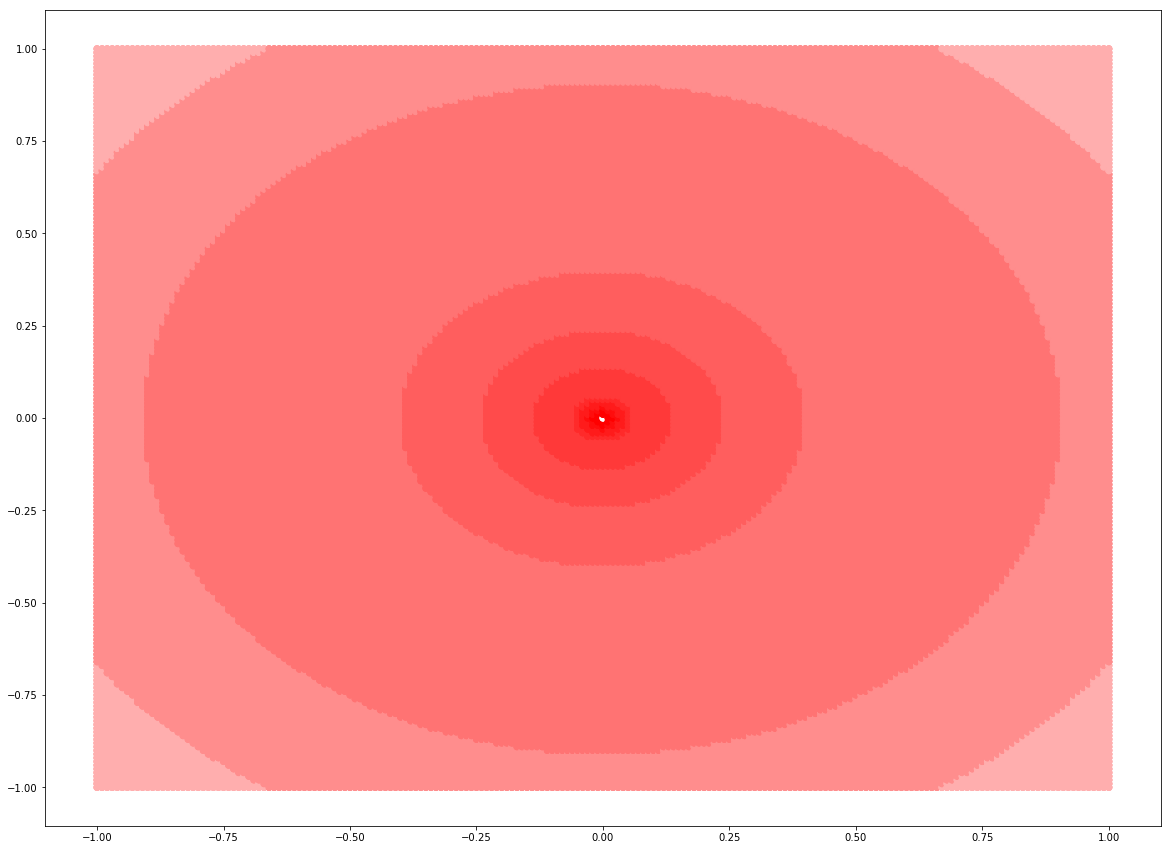

Real =  -1.6


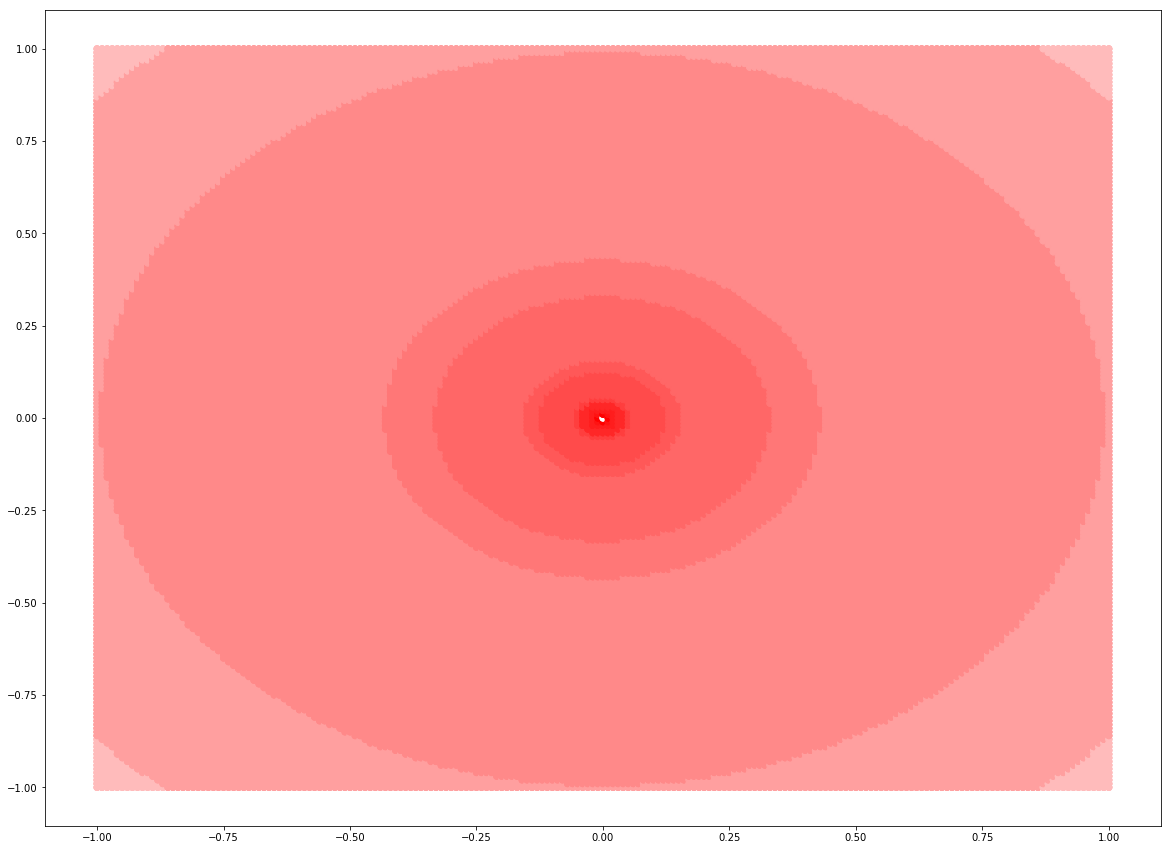

Real =  -1.5


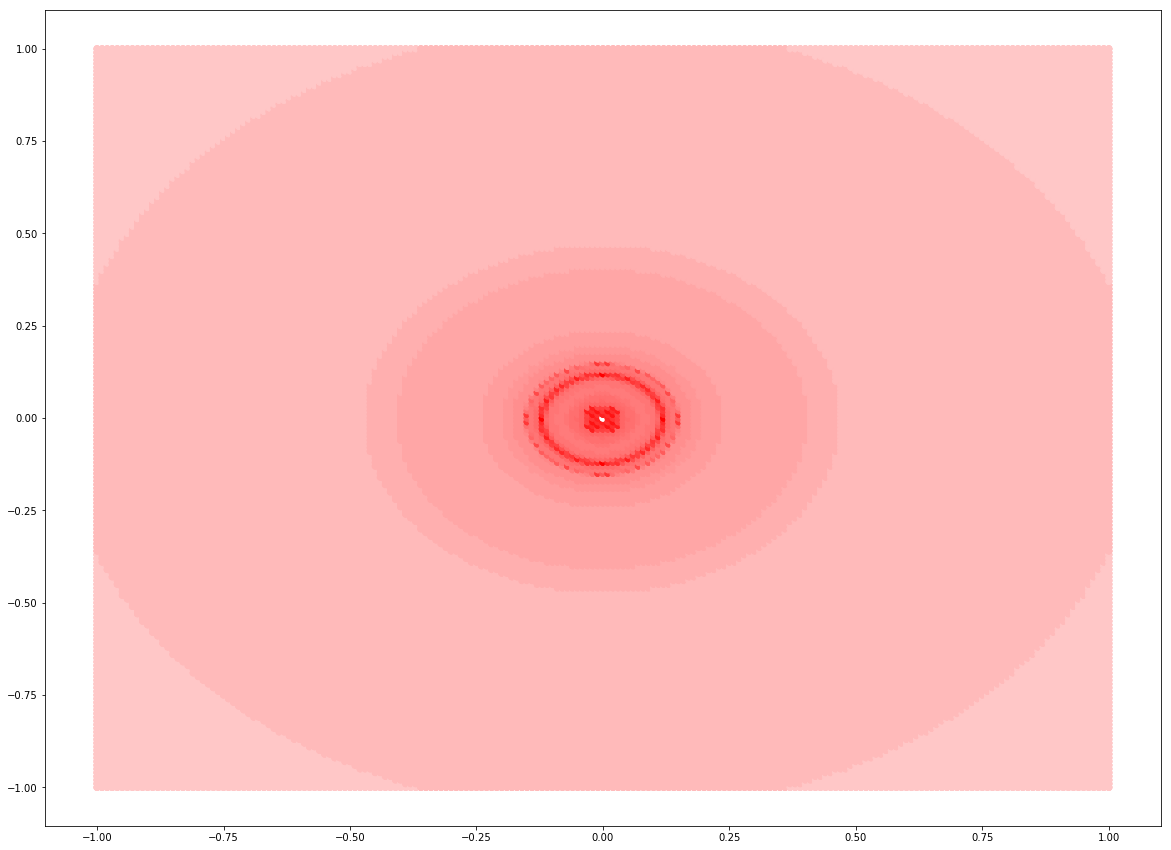

Real =  -1.4


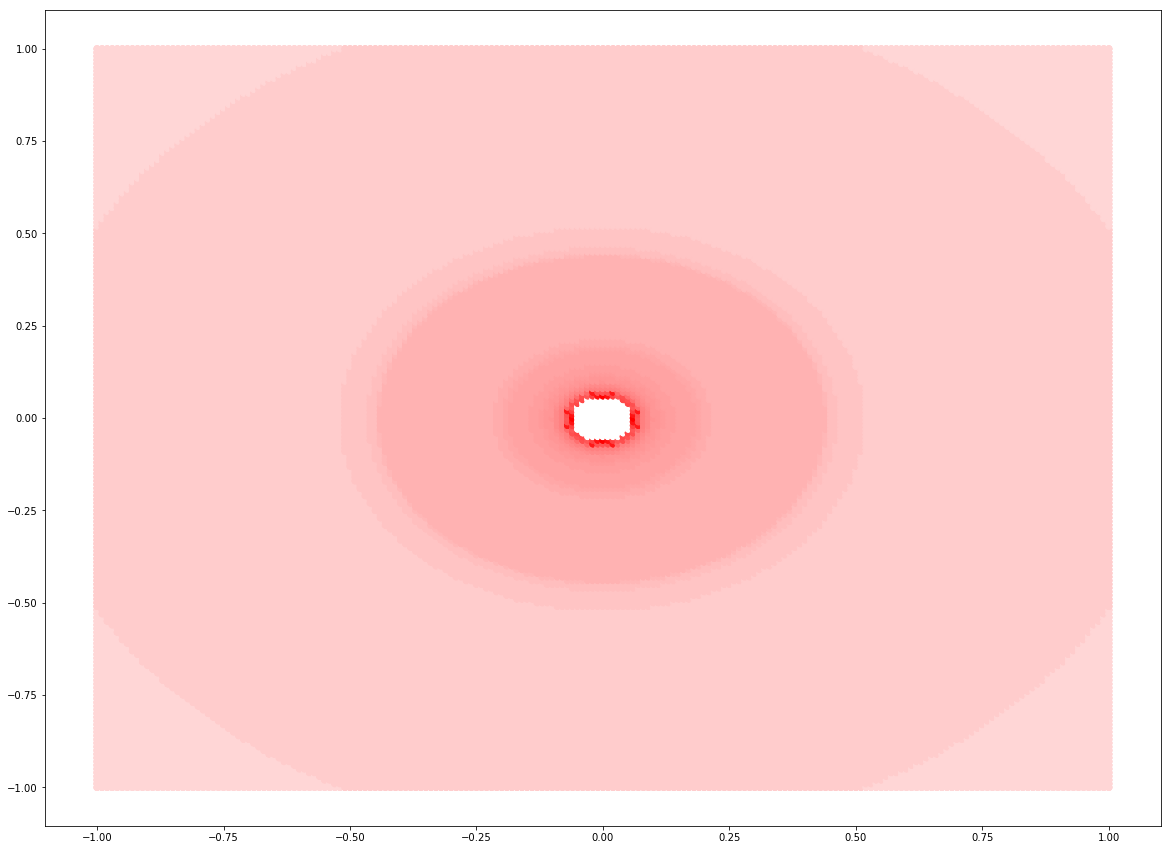

Real =  -1.3


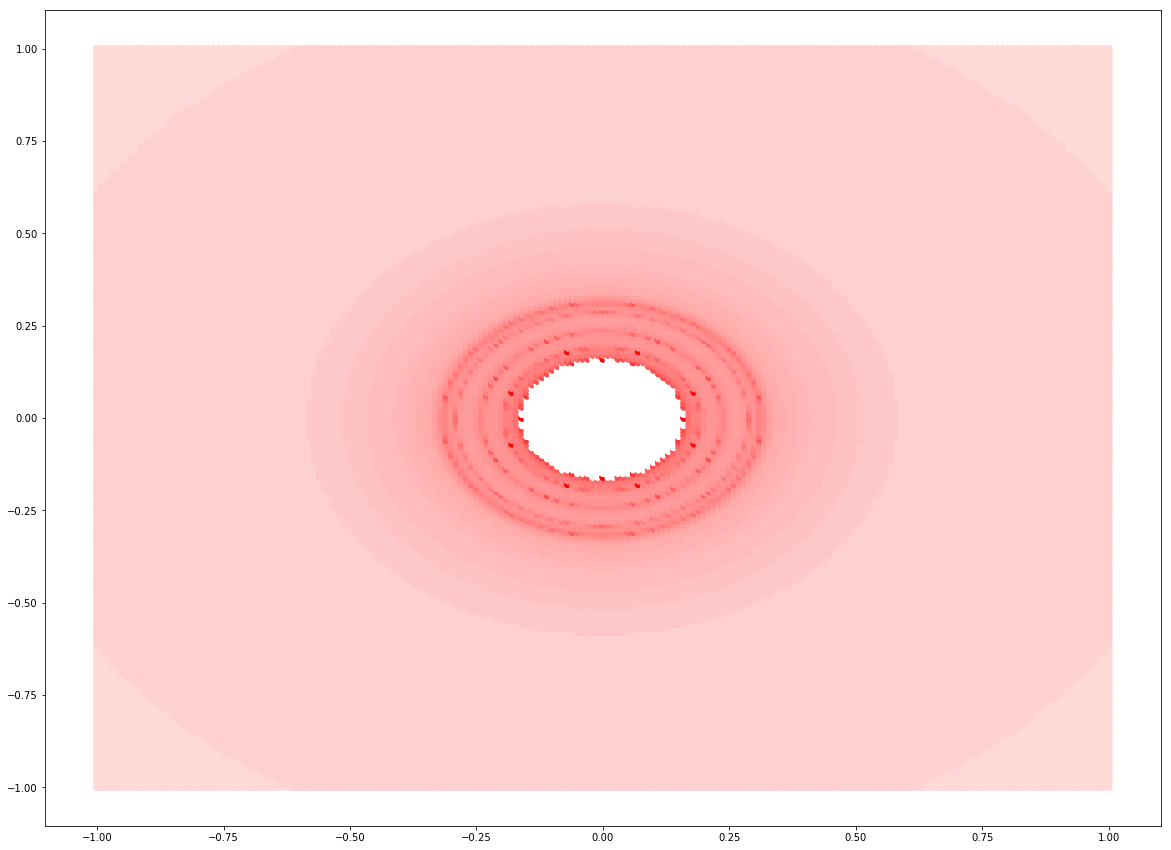

Real =  -1.2


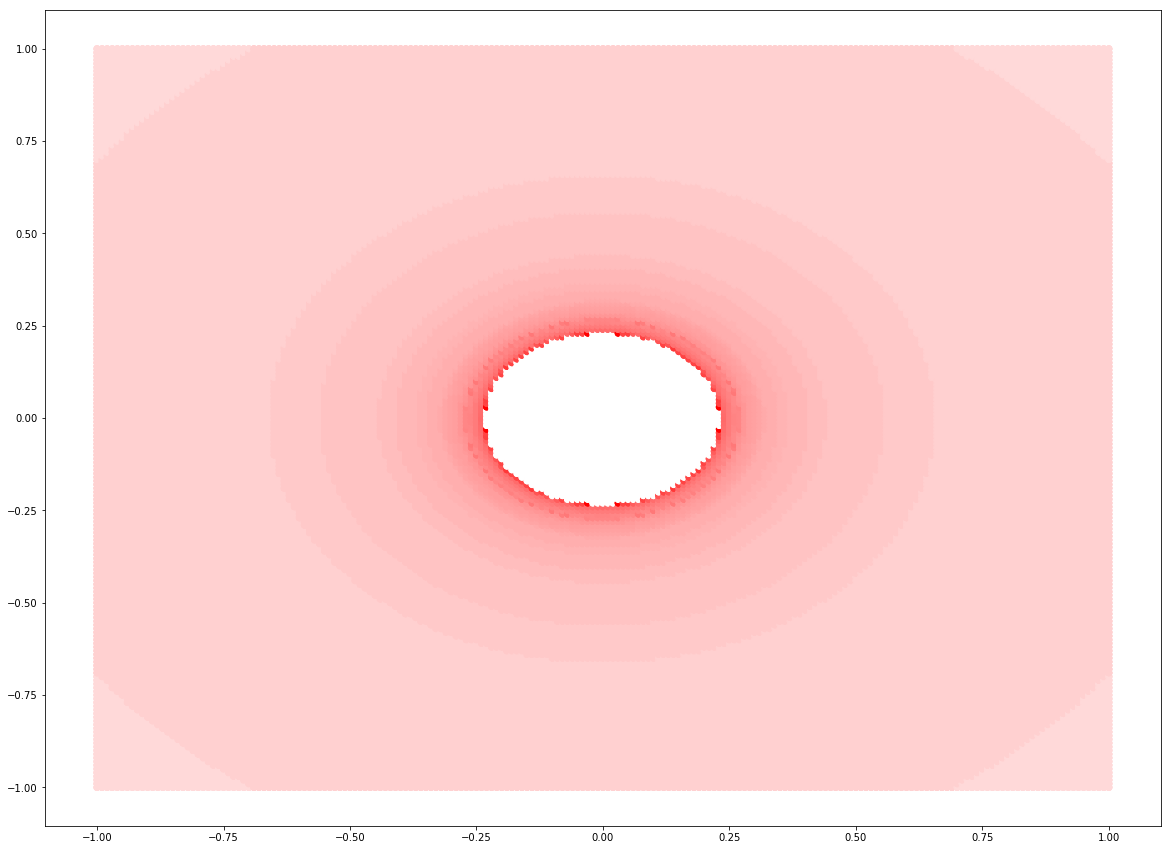

Real =  -1.1


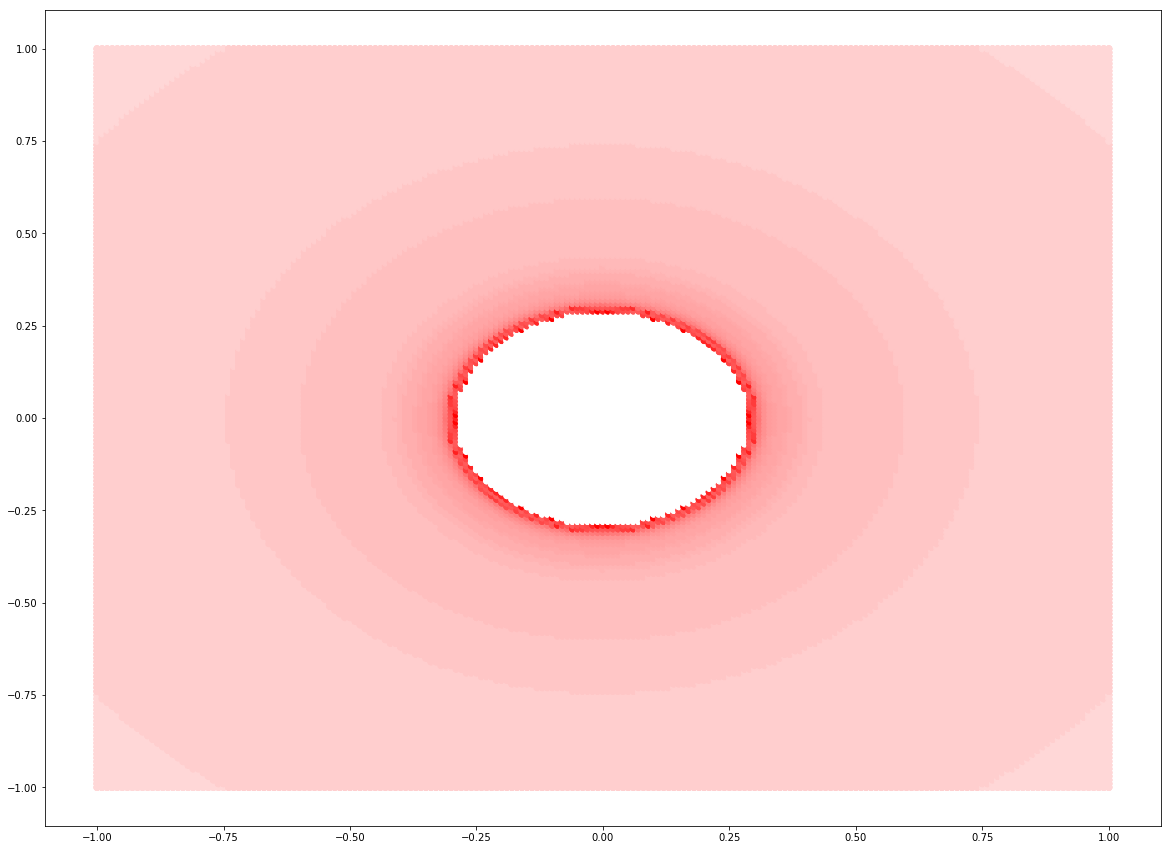

Real =  -1.0


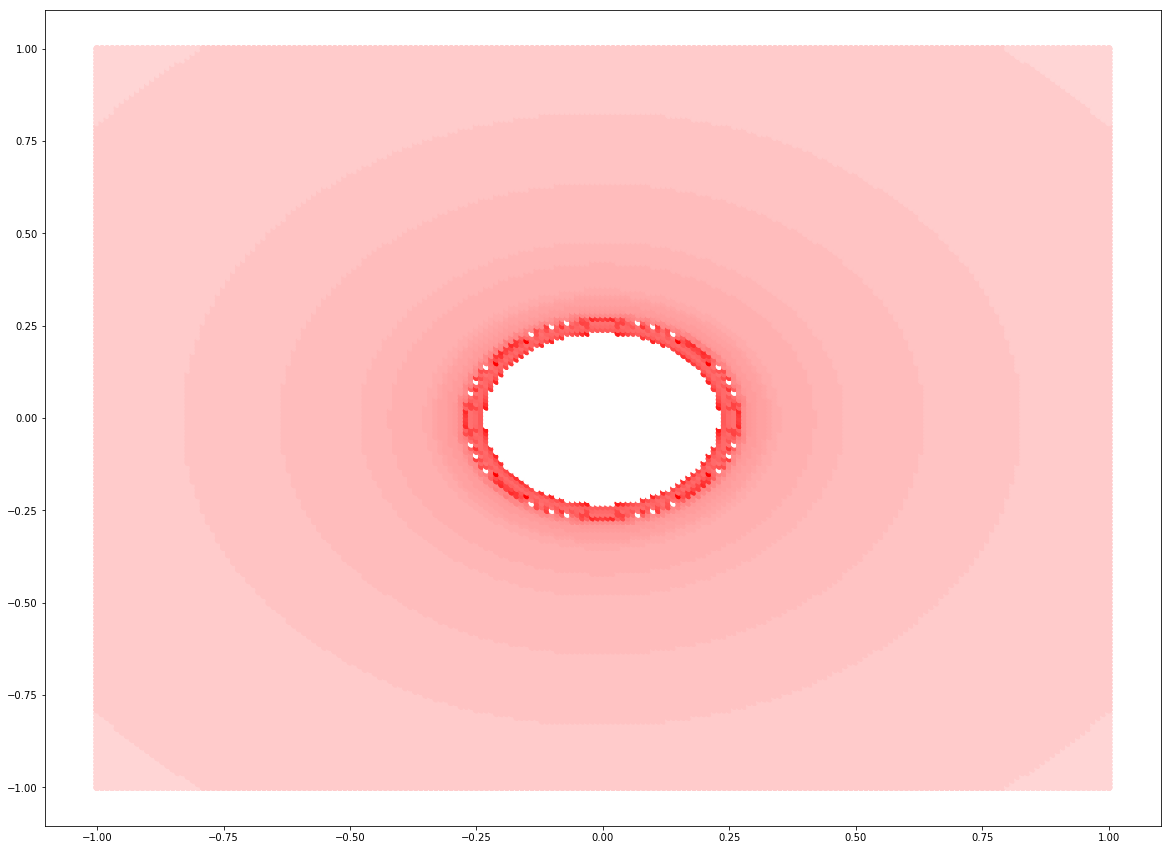

Real =  -0.8999999999999999


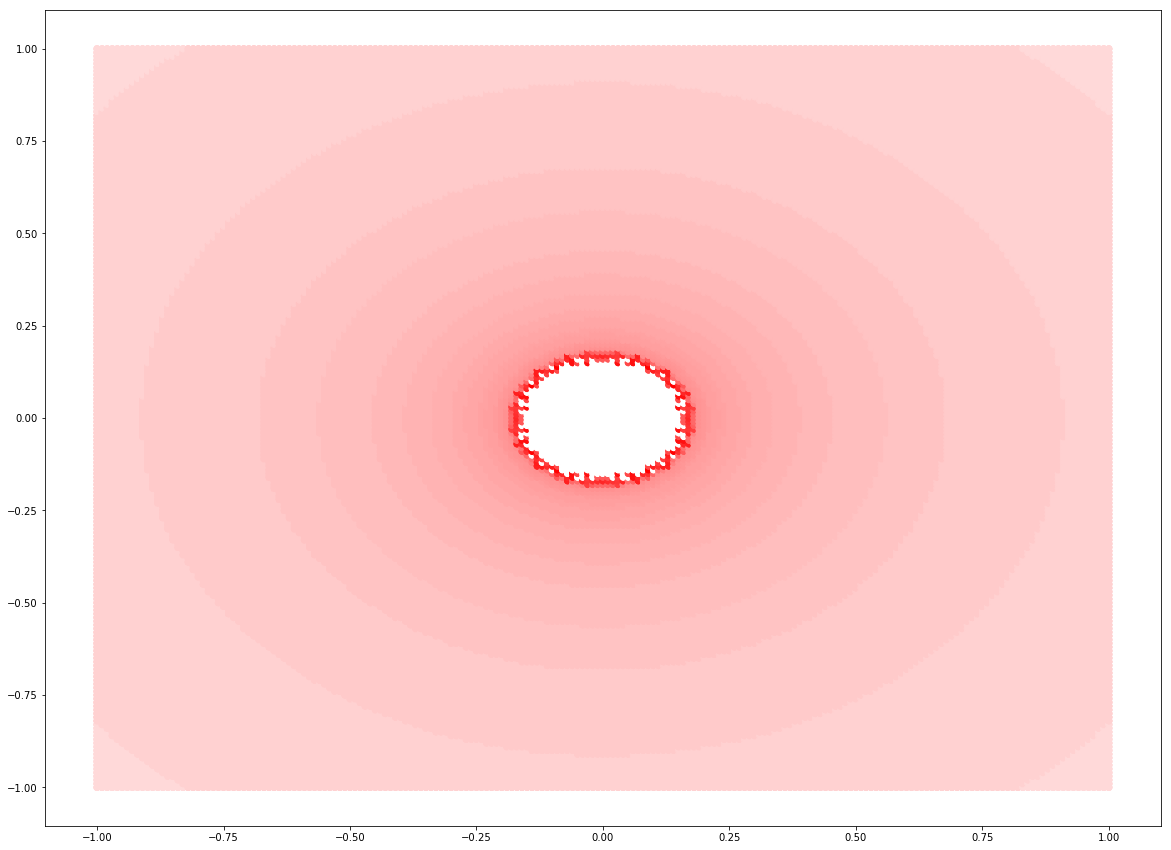

Real =  -0.8


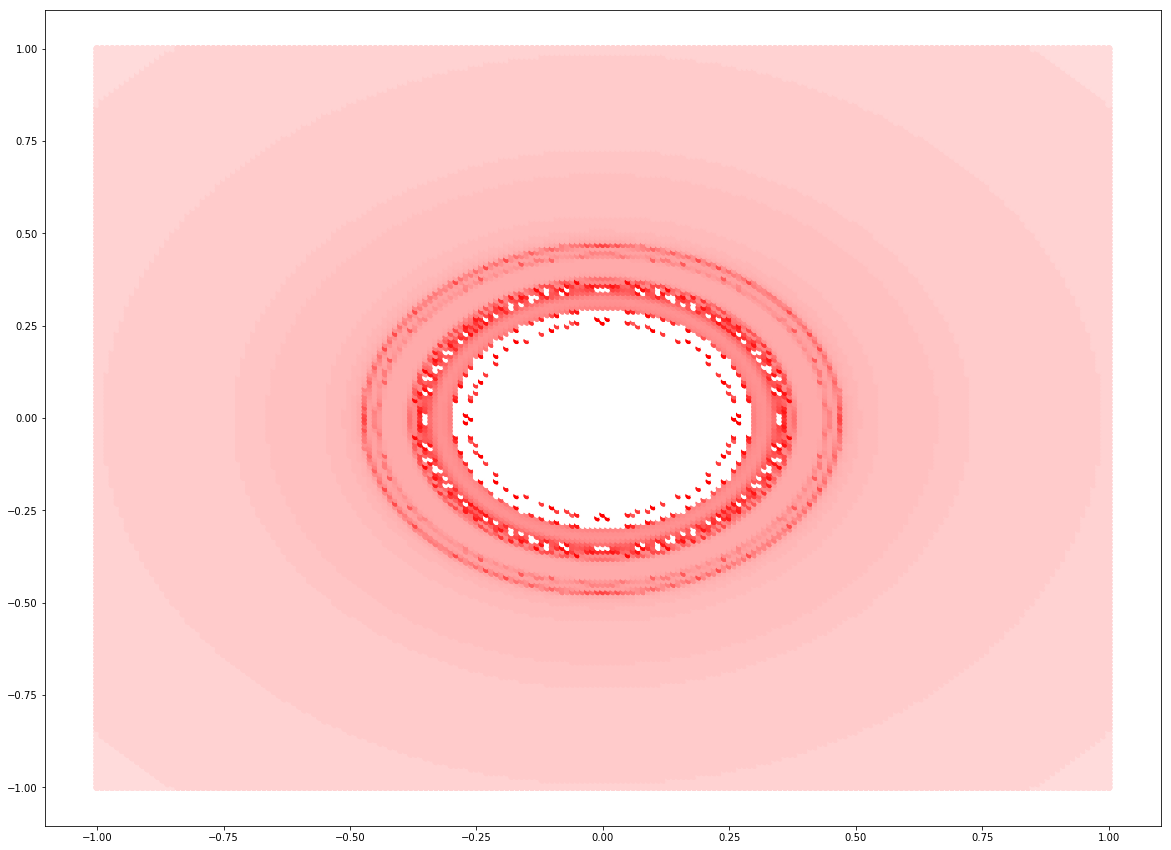

Real =  -0.7


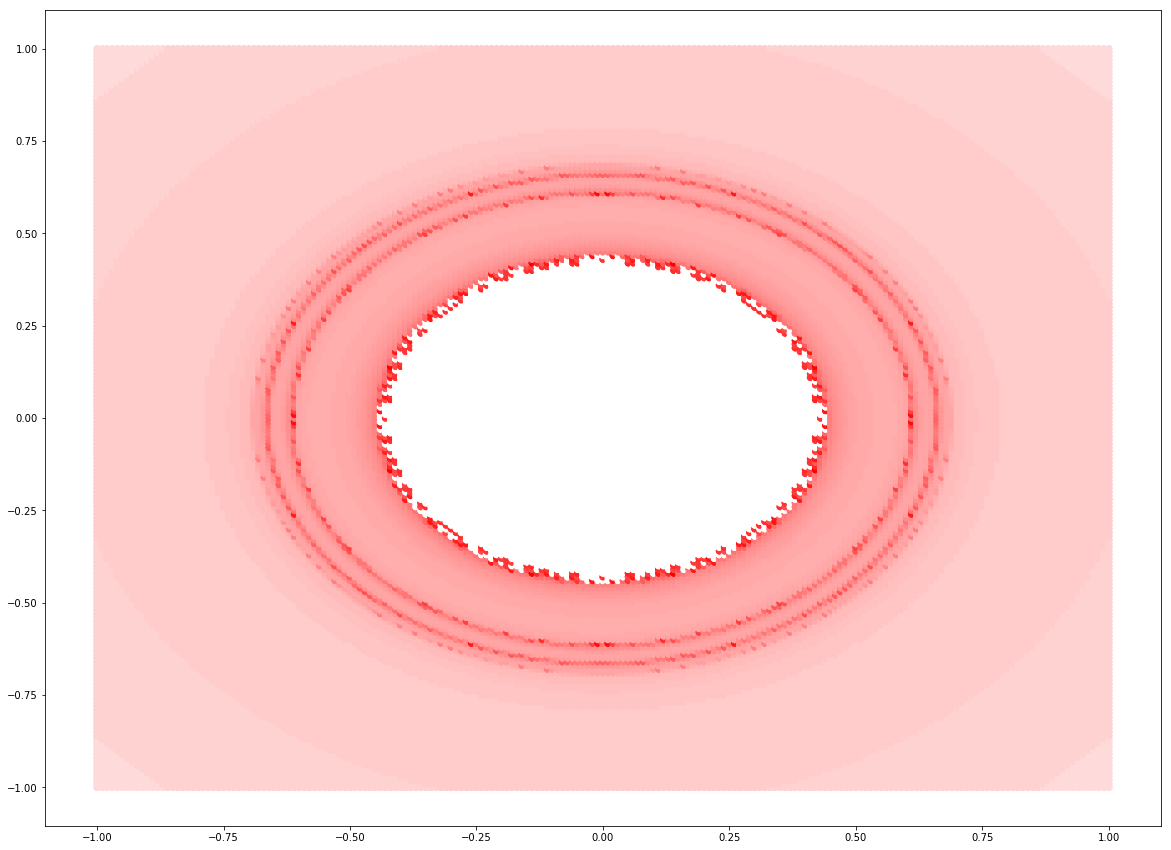

Real =  -0.6000000000000001


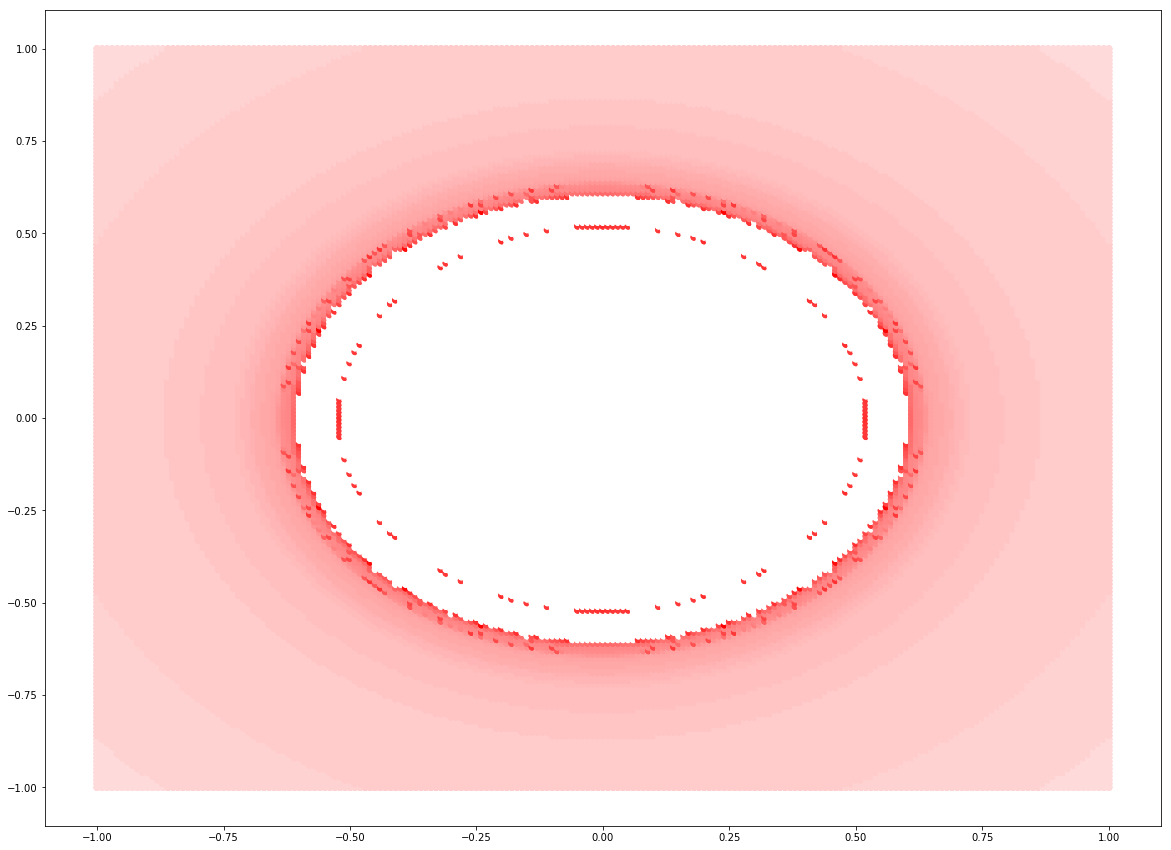

Real =  -0.5


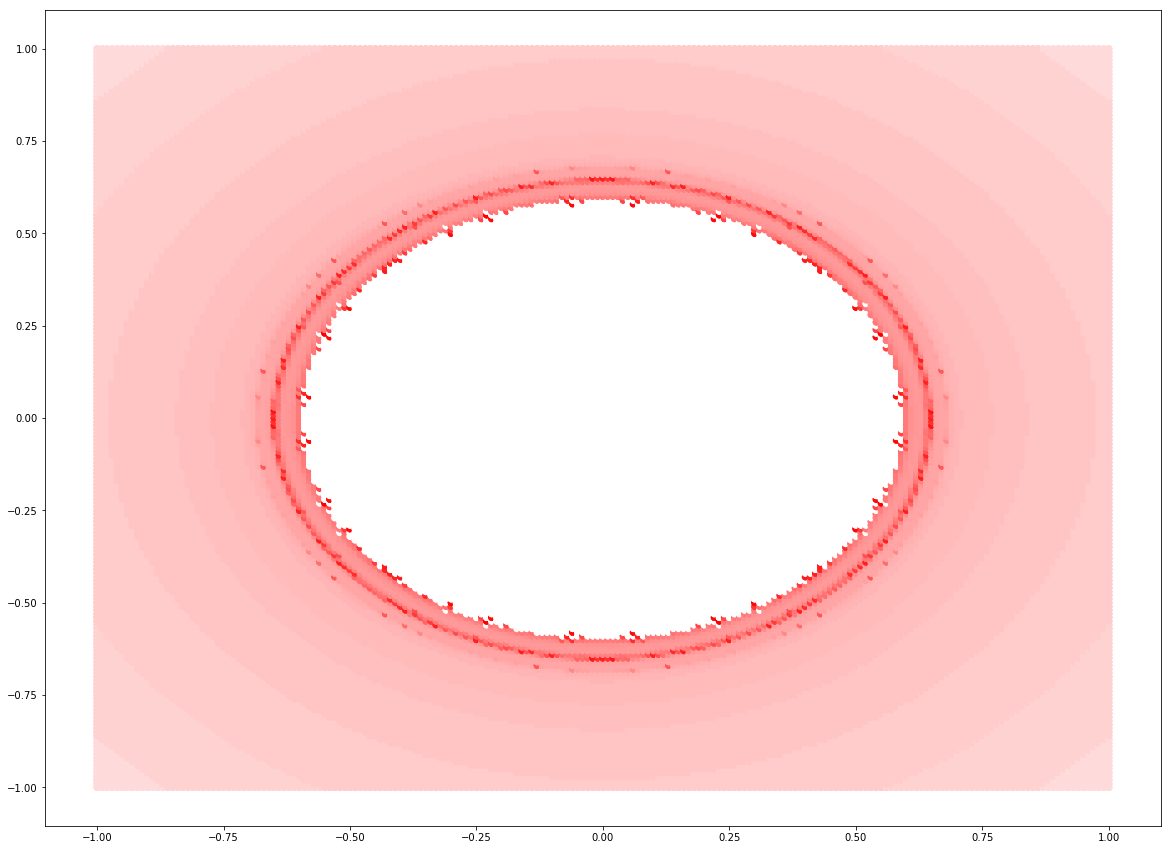

Real =  -0.3999999999999999


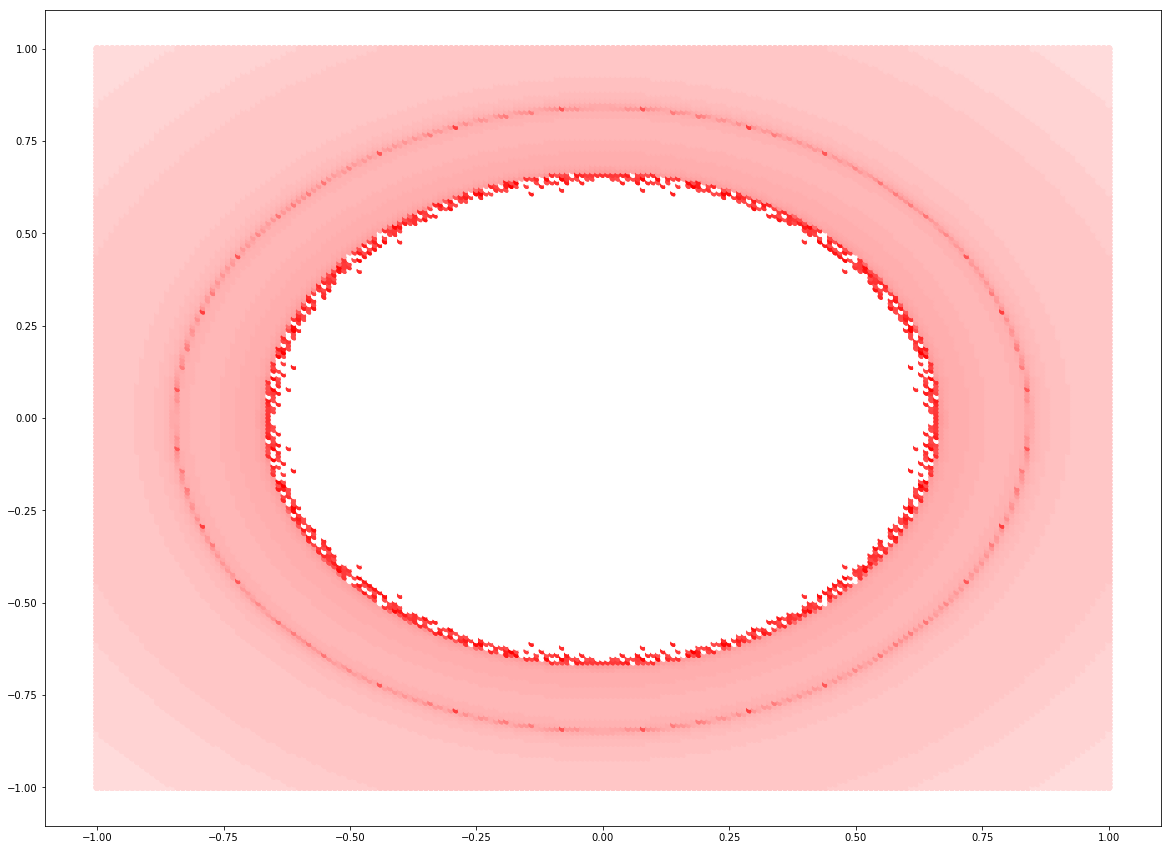

Real =  -0.30000000000000004


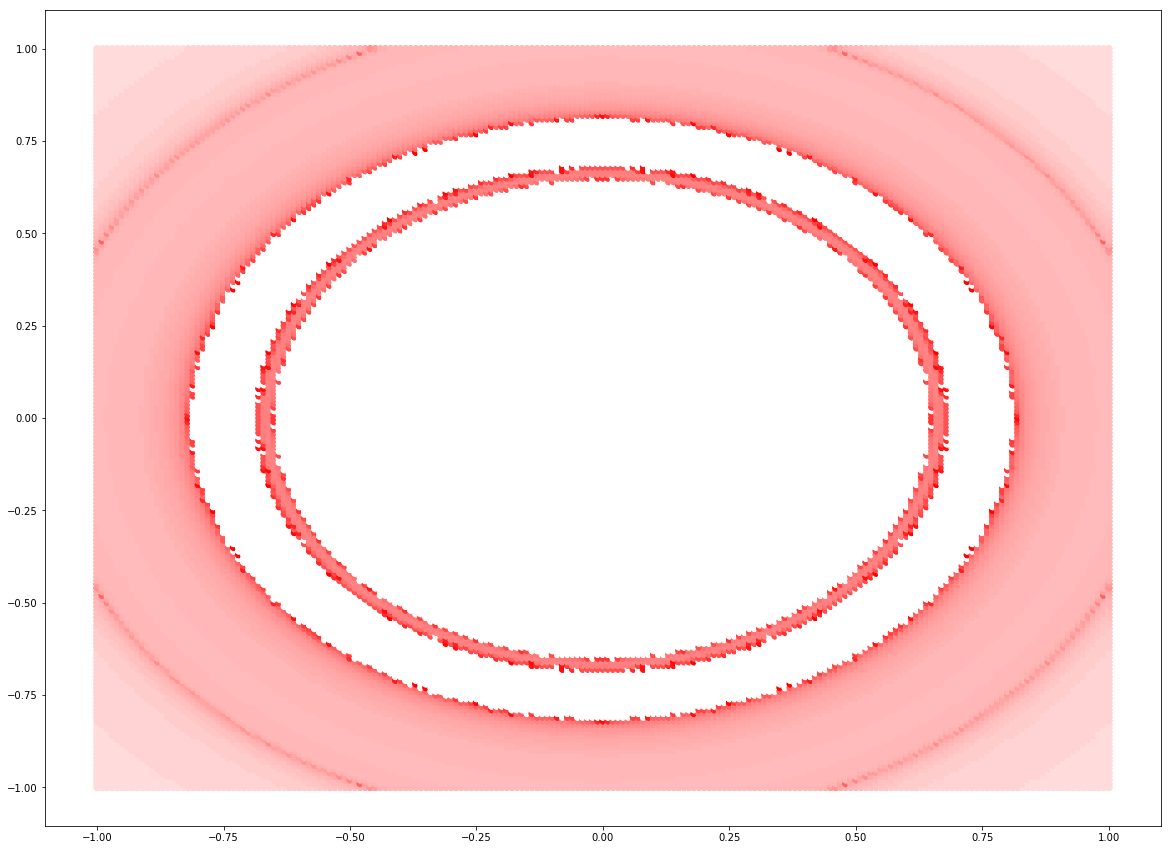

Real =  -0.19999999999999996


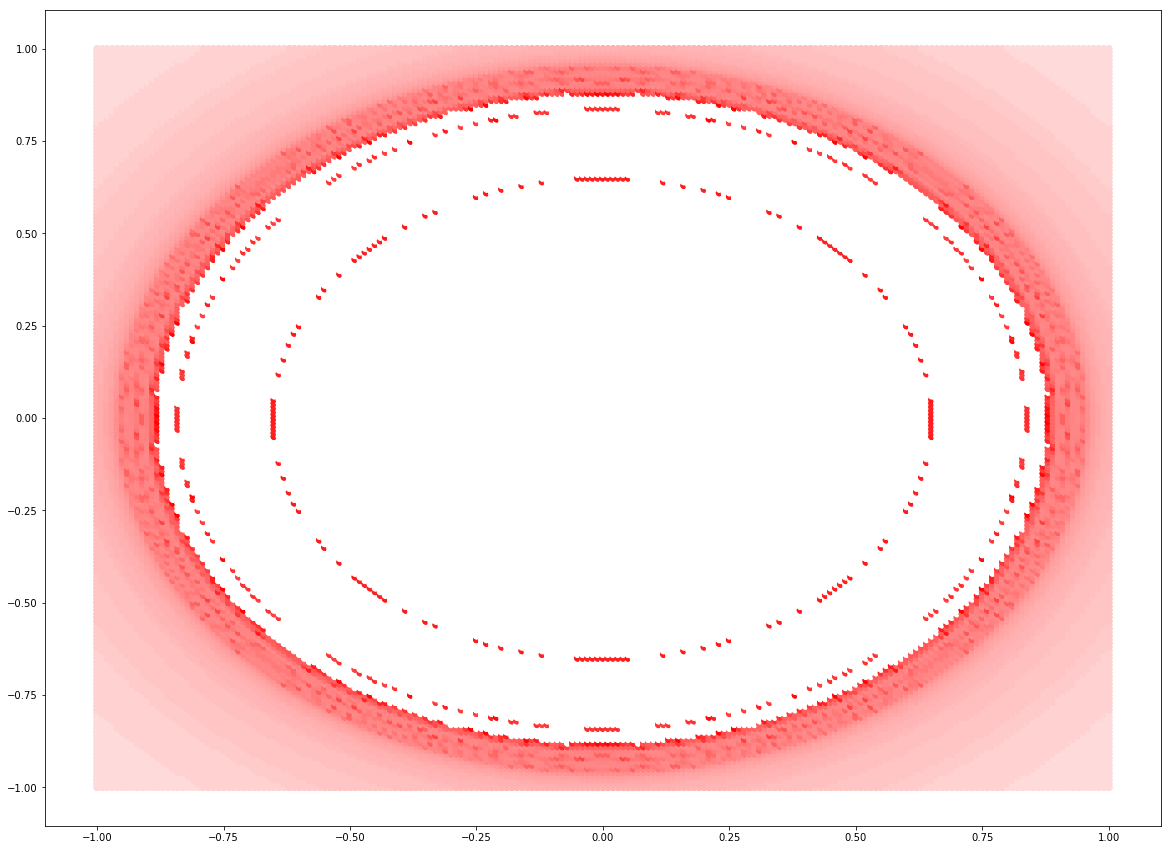

Real =  -0.10000000000000009


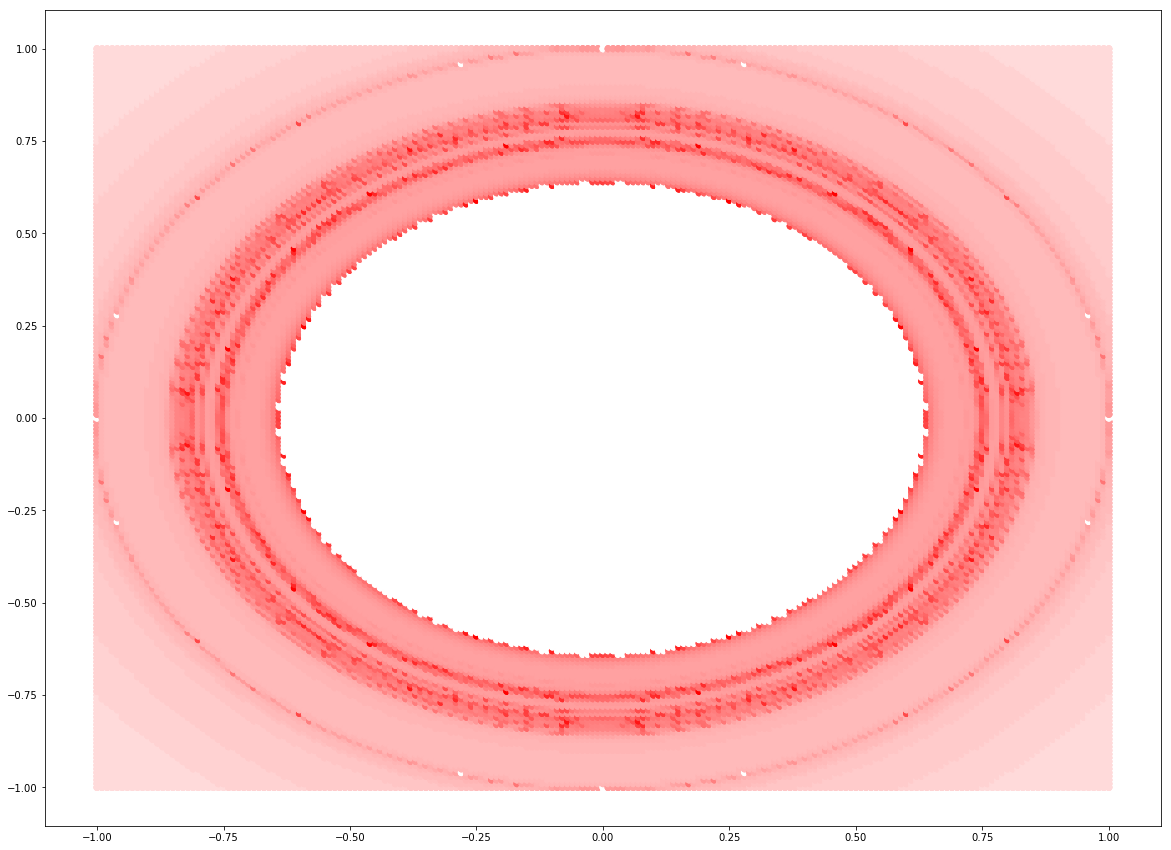

Real =  0.0


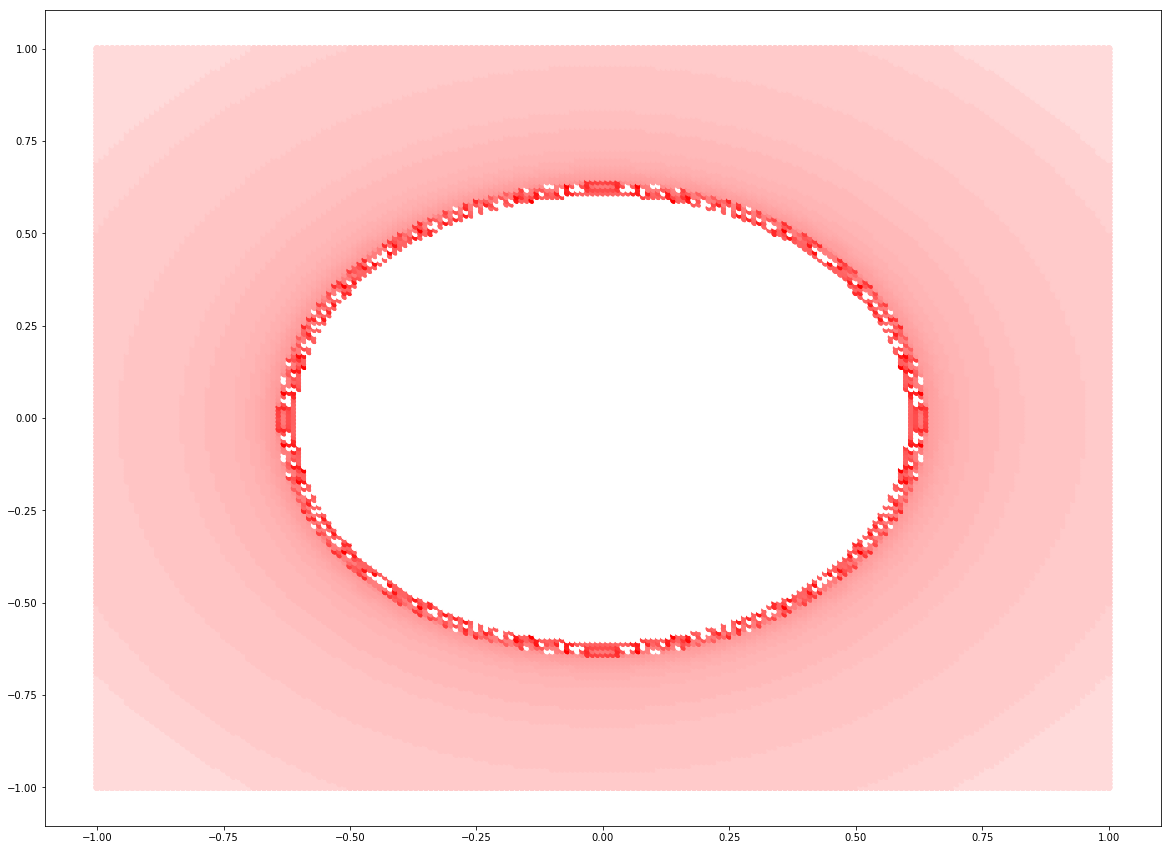

Real =  0.10000000000000009


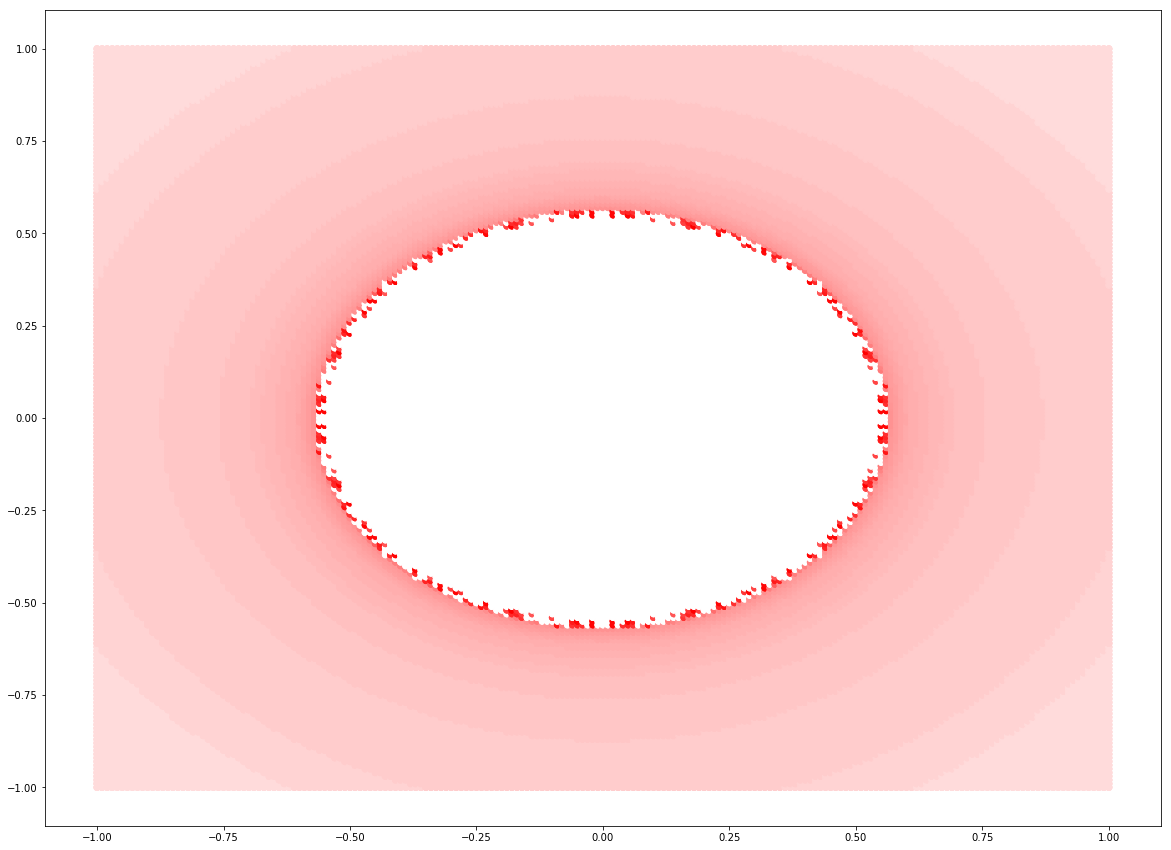

Real =  0.20000000000000018


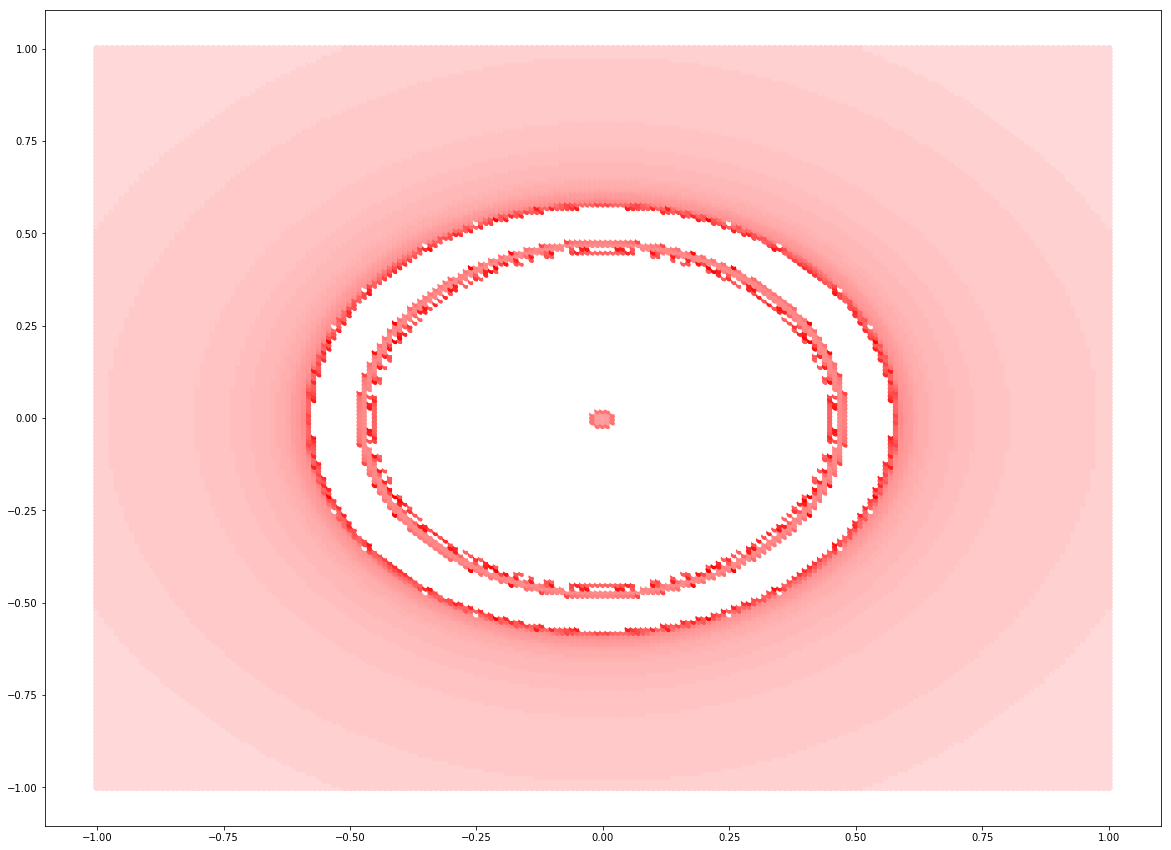

Real =  0.2999999999999998


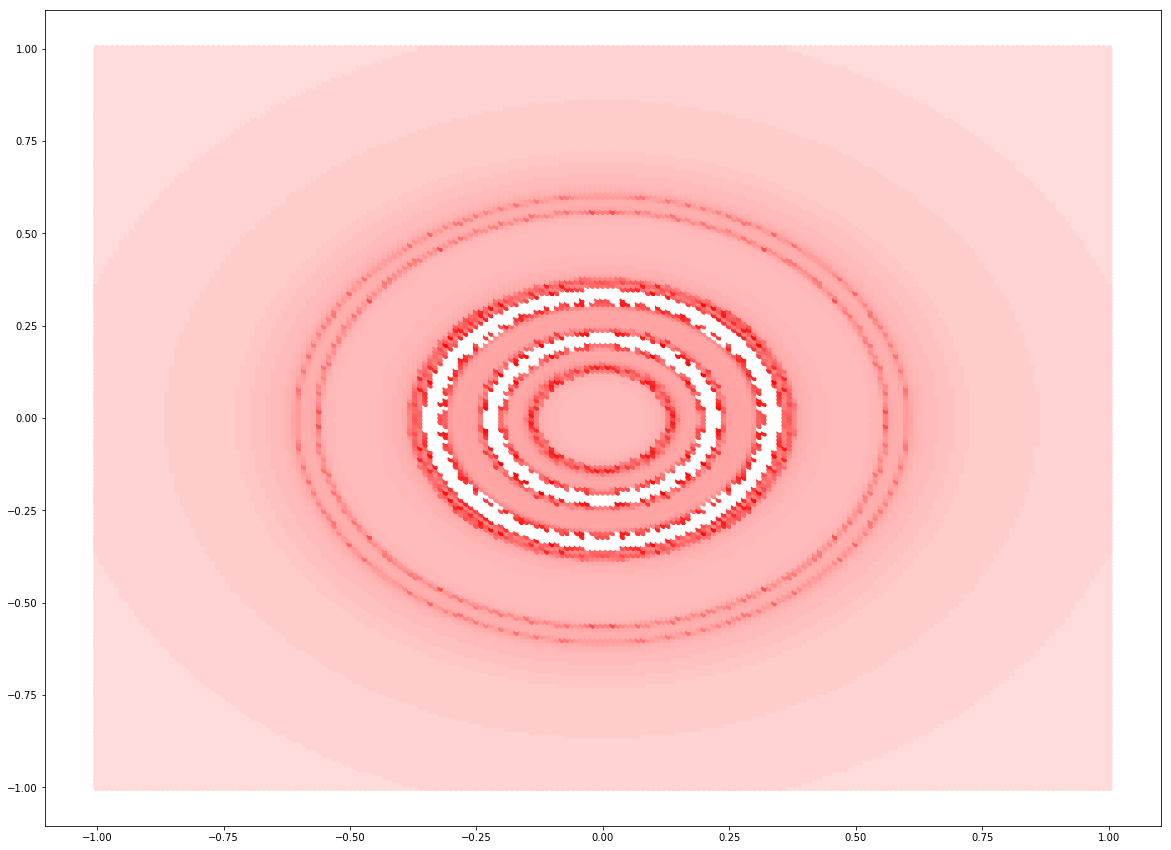

Real =  0.3999999999999999


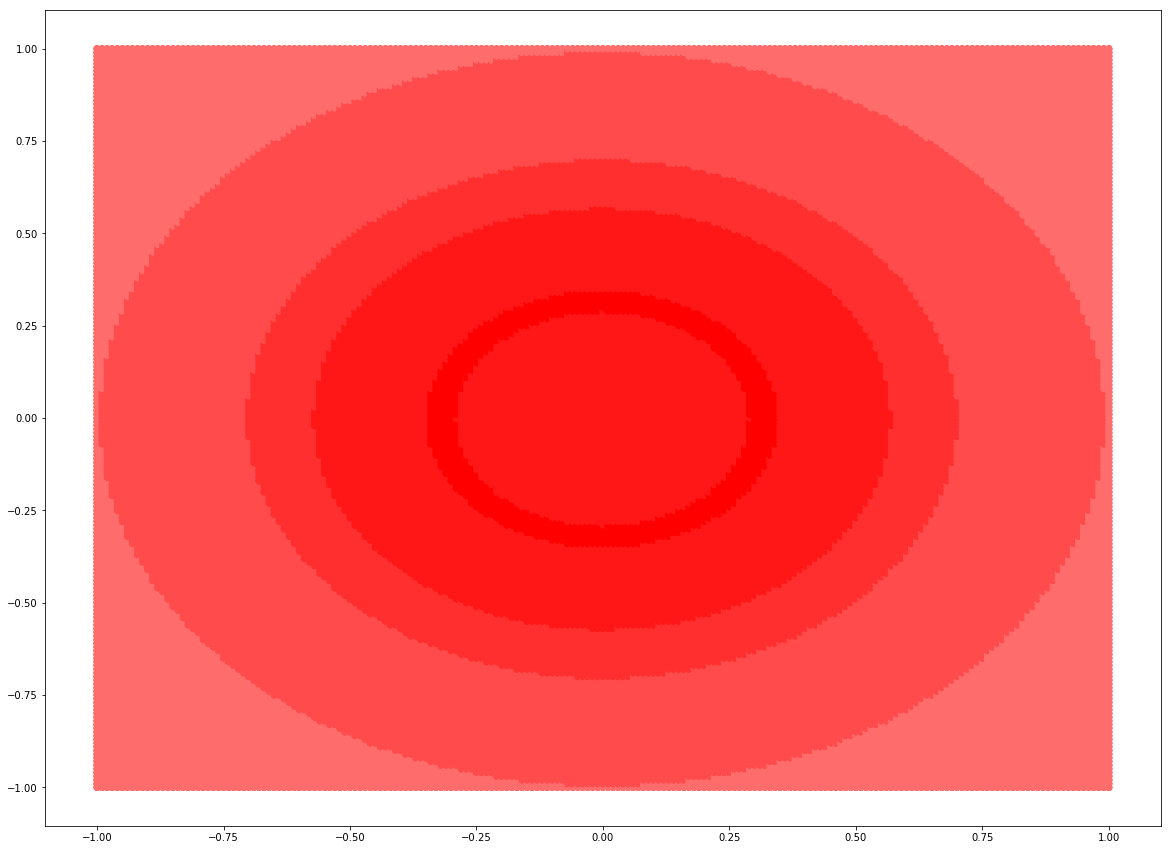

Real =  0.5


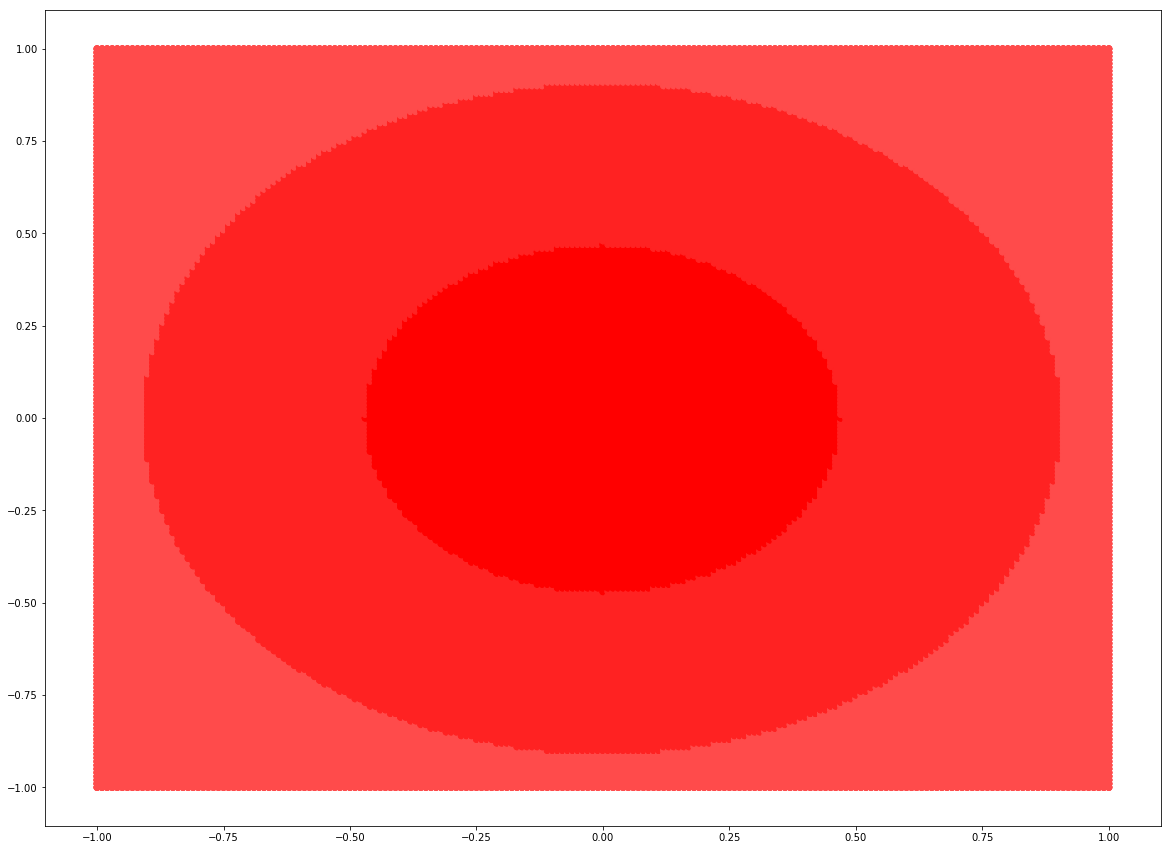

Real =  0.6000000000000001


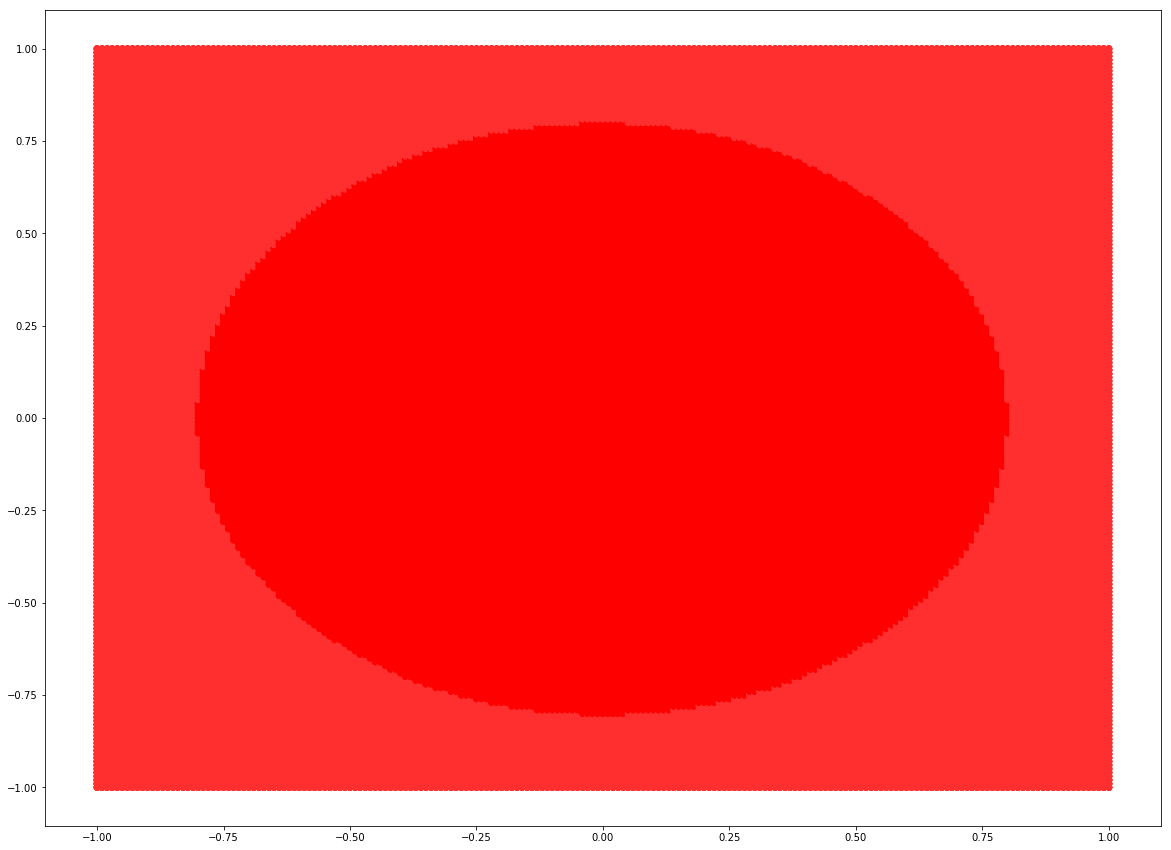

Real =  0.7000000000000002


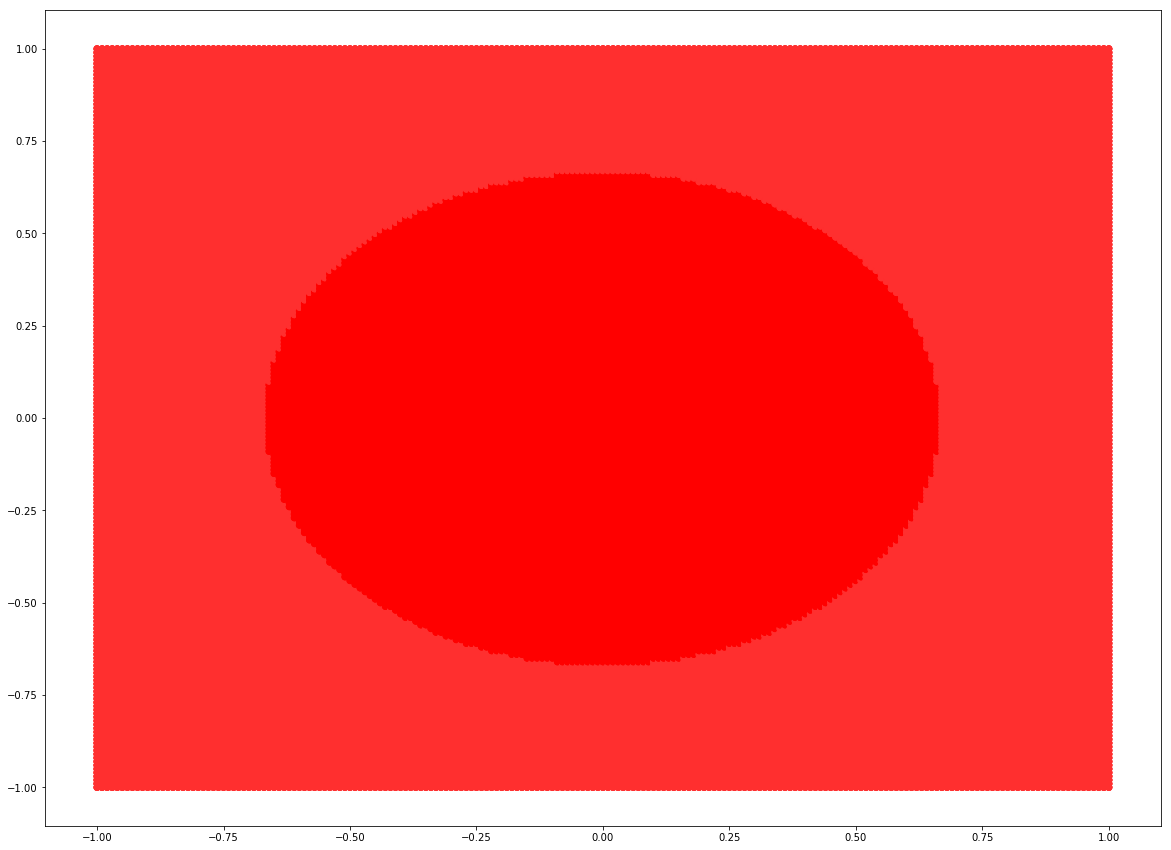

Real =  0.7999999999999998


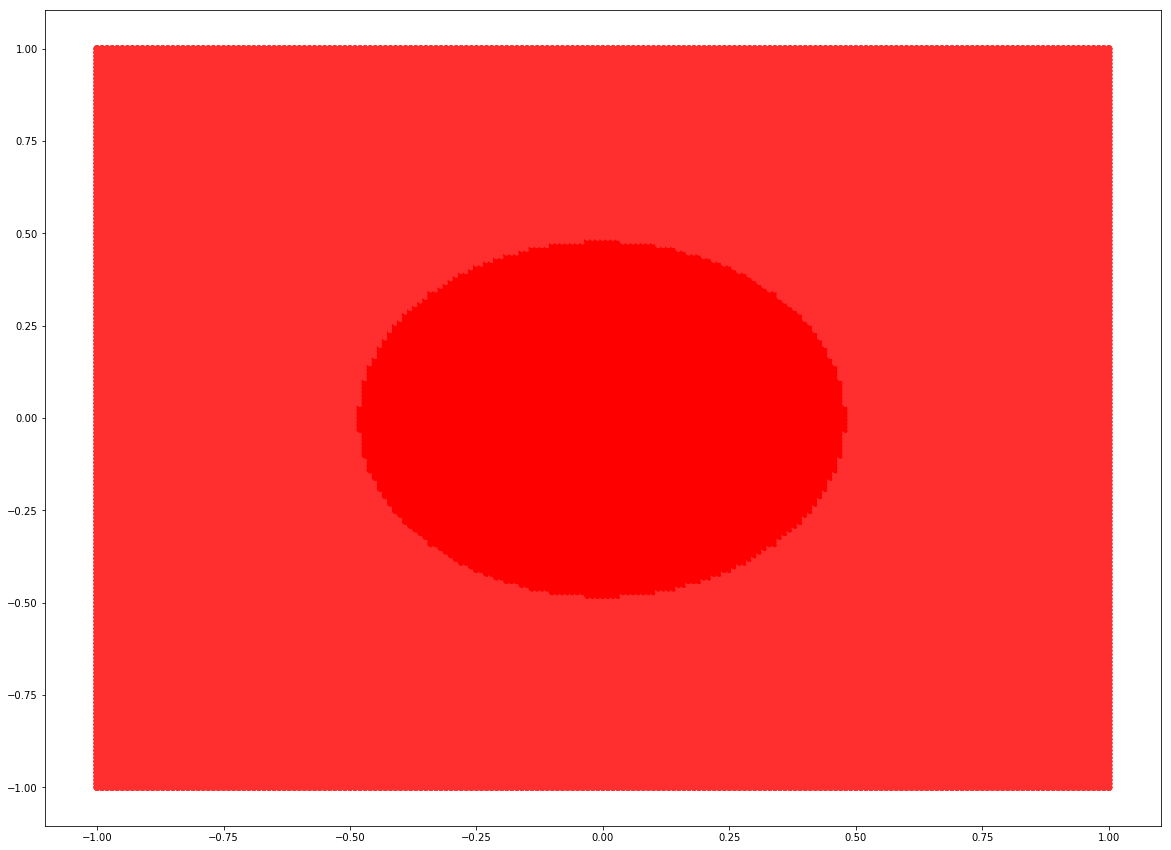

Real =  0.8999999999999999


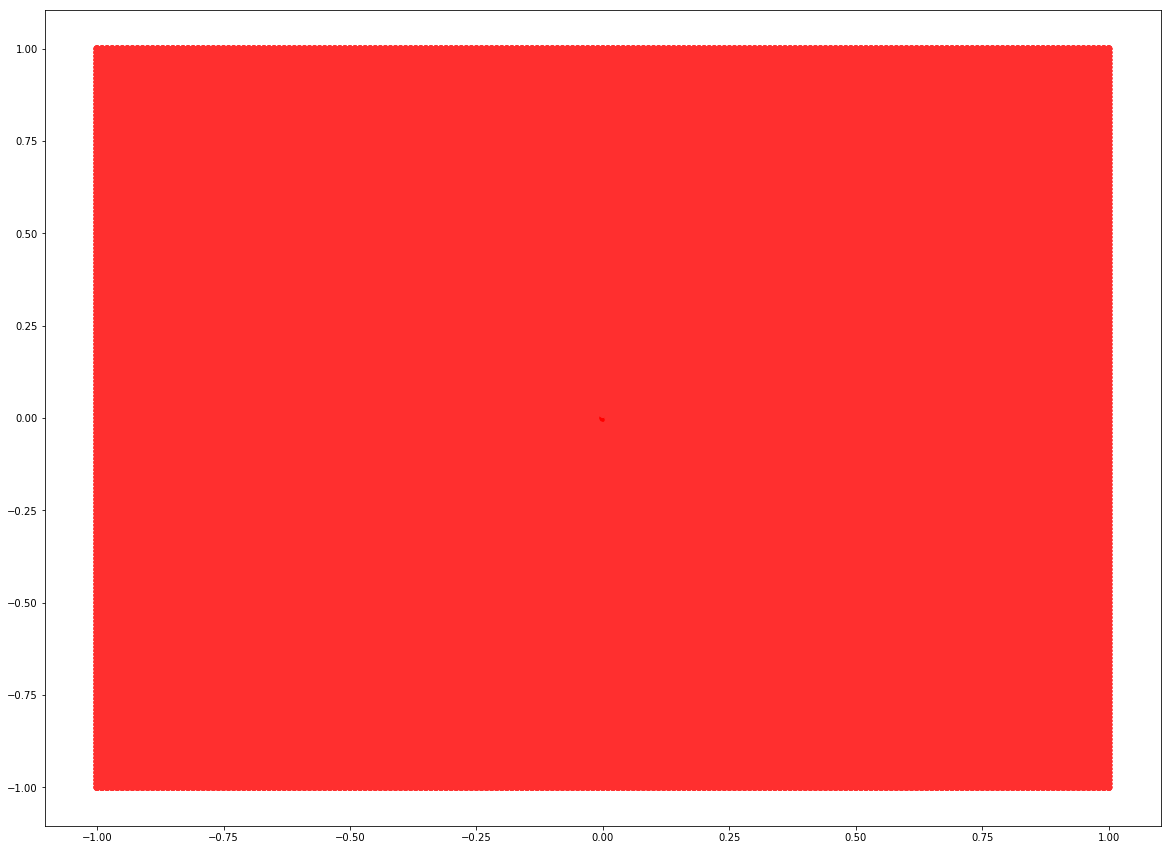

Real =  1.0


In [76]:
for i in range(31):
    rj = slowrijk([-2+i/10,-2+i/10,1],[-1,1,200],[-1,1,200],[0])
    itrs = mandelbrot(rj, 100)
    #plt.scatter(*plotRijk(rijk2, [0]), c=a)
    fig = plt.figure(figsize=[20,15])
    ax = fig.gca()
    x,y = plotRijk(rj, [0], 'ij')
    c = colourmap(itrs,[1,1,1])
    ax.scatter(x,y,c=c)
    plt.show()
    plt.close(fig)
    print("Real = ", -2+i/10)

Rijk generated in 2.49514 seconds
Checked all points in 0.09027 seconds
Colourmap generated in 0.04821 seconds
Drawn in 3.73046 seconds
Estimated load time: 18.65479 seconds


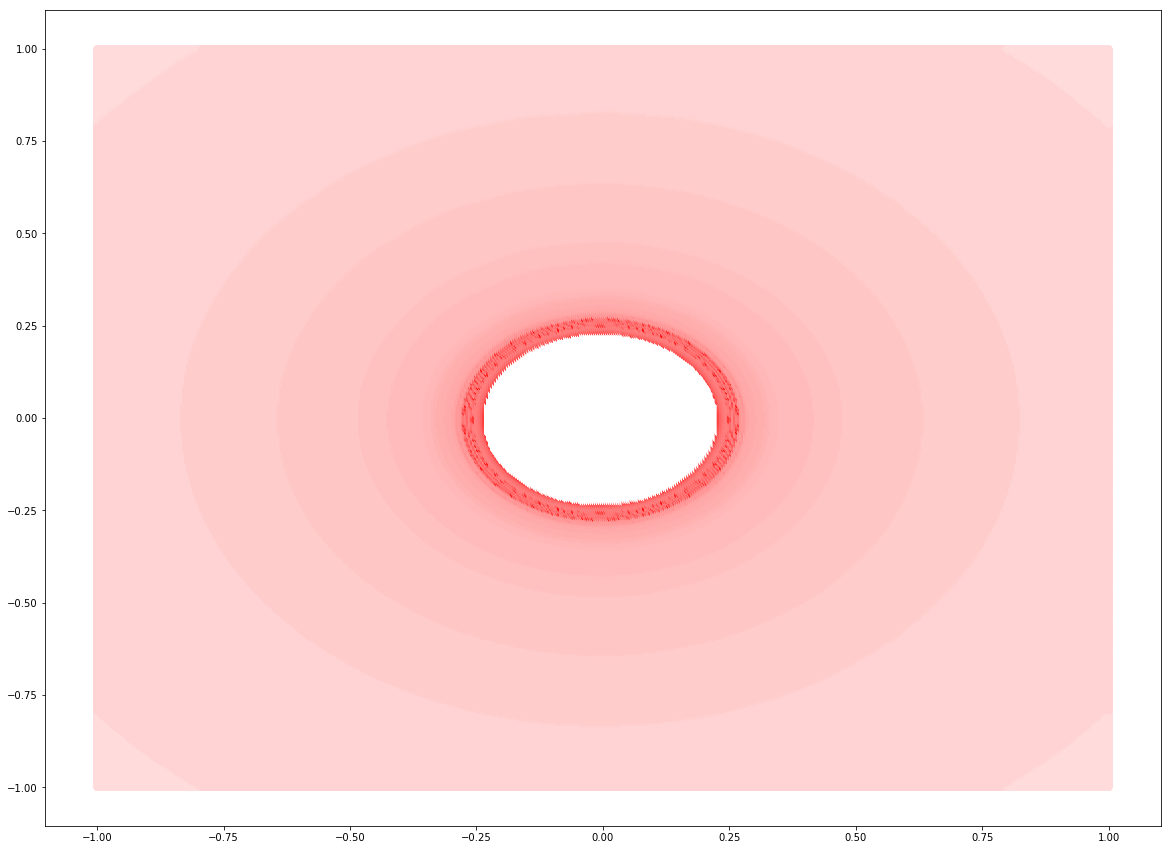

Loaded in 56.15292 seconds
Real =  -0.8999999999999999
Rijk generated in 2.57881 seconds
Checked all points in 0.06368 seconds
Colourmap generated in 0.0466 seconds
Drawn in 3.28173 seconds
Estimated load time: 16.41116 seconds


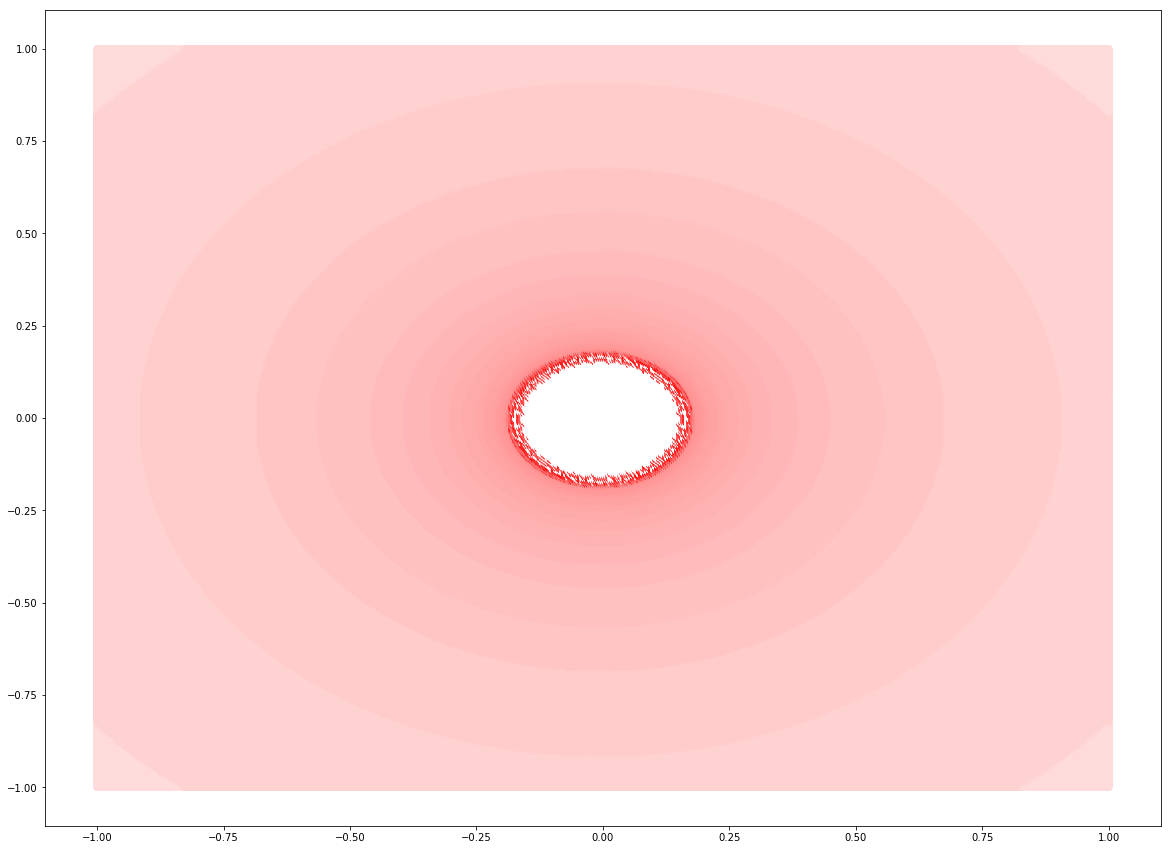

Loaded in 55.33394 seconds
Real =  -0.8
Rijk generated in 2.69417 seconds
Checked all points in 0.1489 seconds
Colourmap generated in 0.05114 seconds
Drawn in 3.87612 seconds
Estimated load time: 19.38061 seconds


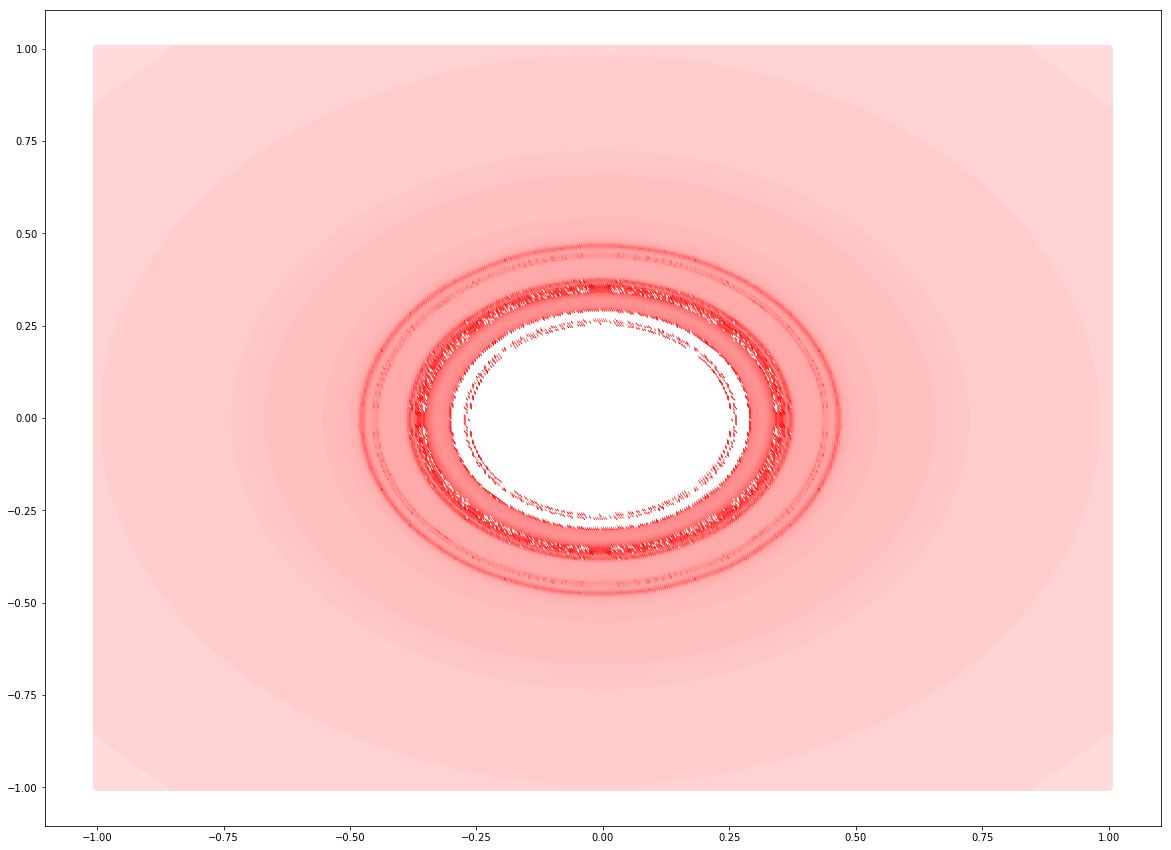

Loaded in 55.4299 seconds
Real =  -0.7
Rijk generated in 2.50563 seconds
Checked all points in 0.54645 seconds
Colourmap generated in 0.04312 seconds
Drawn in 2.95346 seconds
Estimated load time: 14.7698 seconds


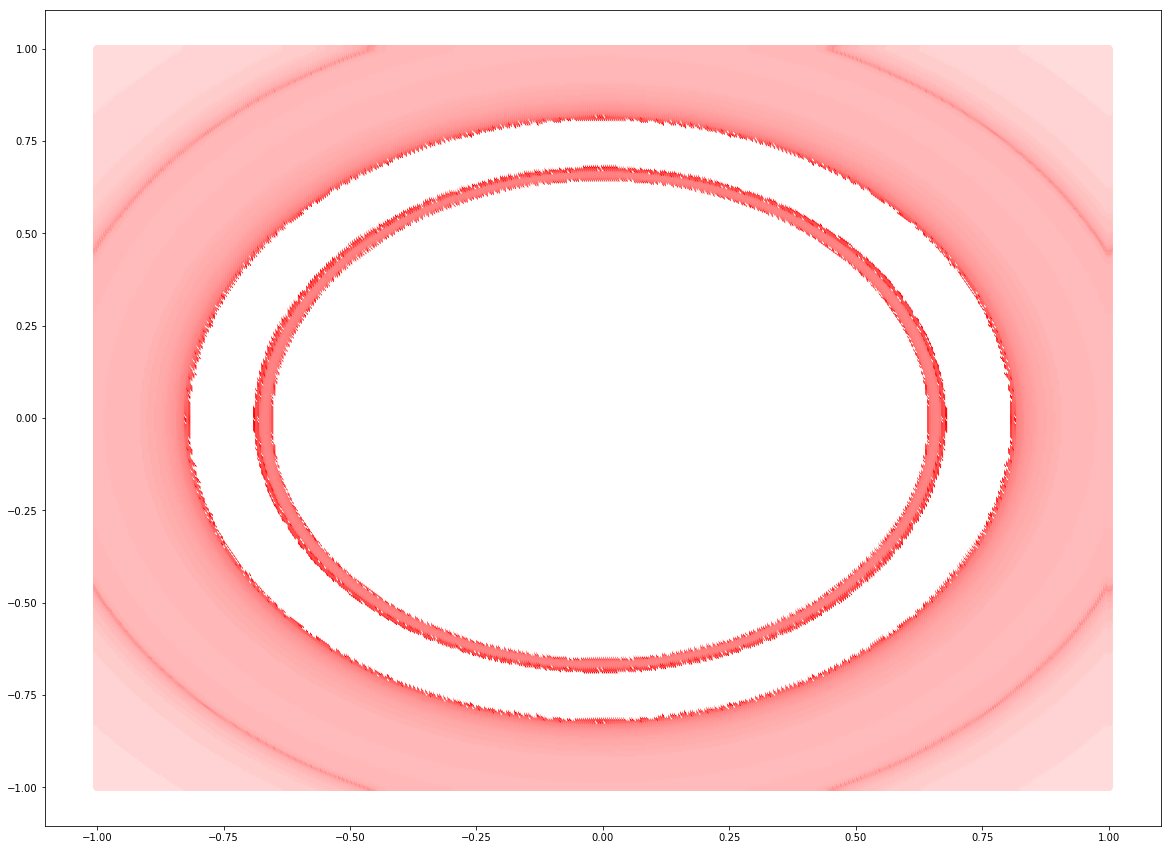

Loaded in 55.03808 seconds
Real =  -0.19999999999999996
Rijk generated in 2.32977 seconds
Checked all points in 0.63281 seconds
Colourmap generated in 0.03667 seconds
Drawn in 2.89677 seconds
Estimated load time: 14.48386 seconds


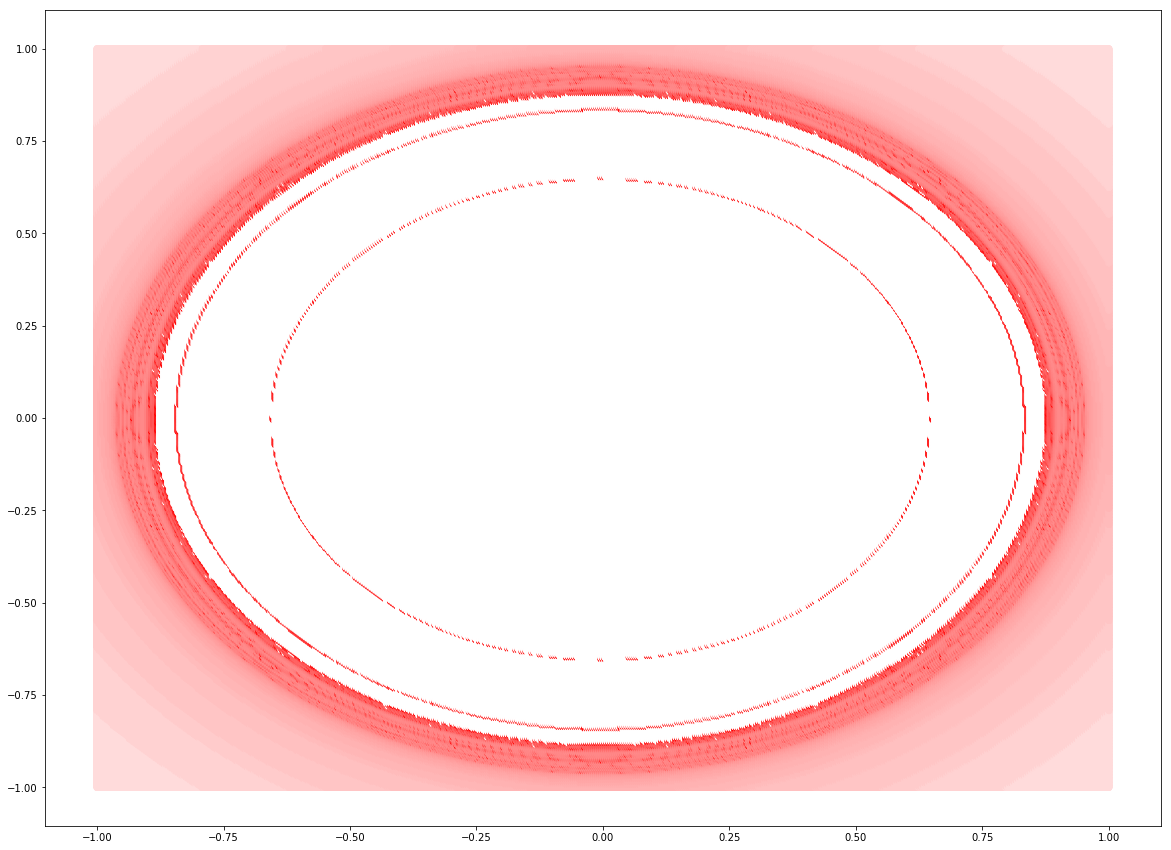

Loaded in 53.77187 seconds
Real =  -0.10000000000000009
Rijk generated in 2.52415 seconds
Checked all points in 0.38452 seconds
Colourmap generated in 0.03908 seconds
Drawn in 2.91582 seconds
Estimated load time: 14.58175 seconds


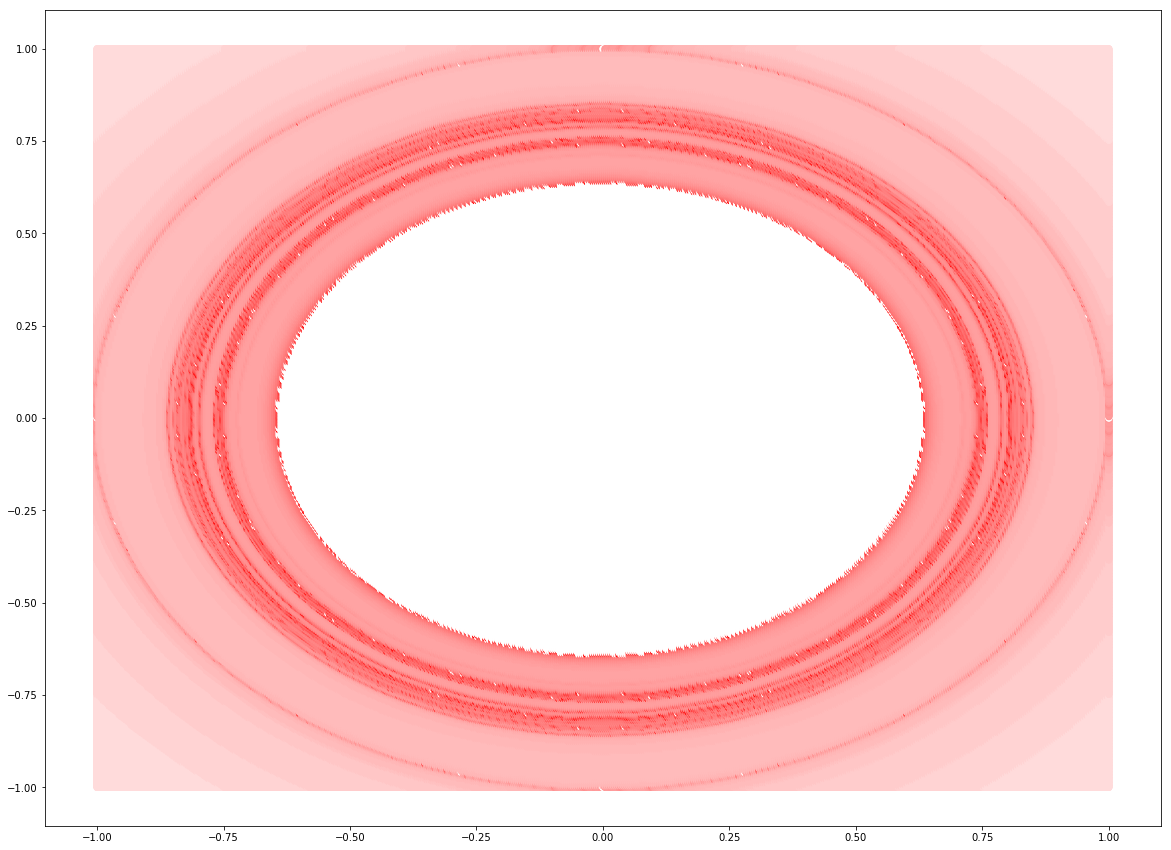

Loaded in 59.51861 seconds
Real =  0.0
Rijk generated in 2.56368 seconds
Checked all points in 0.27373 seconds
Colourmap generated in 0.04359 seconds
Drawn in 3.78869 seconds
Estimated load time: 18.94593 seconds


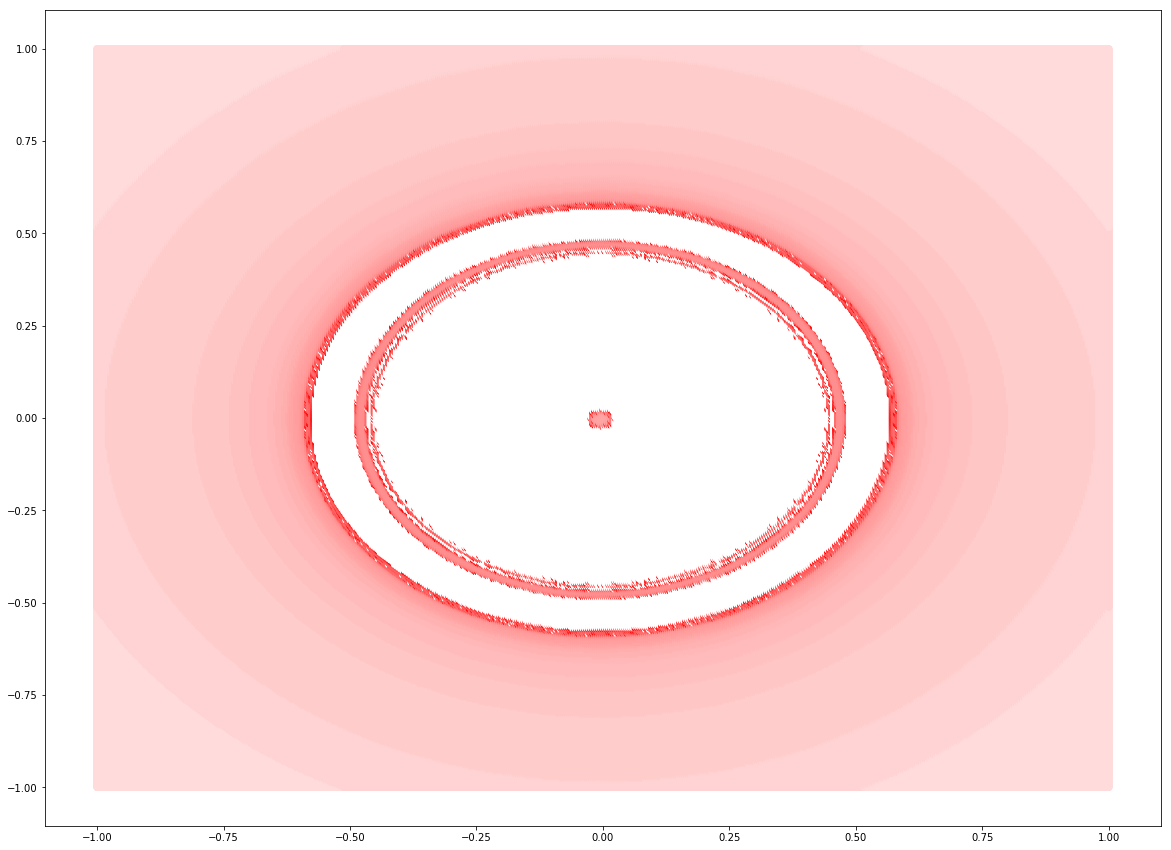

Loaded in 55.50548 seconds
Real =  0.2999999999999998
Rijk generated in 2.34528 seconds
Checked all points in 0.07444 seconds
Colourmap generated in 0.05994 seconds
Drawn in 2.82369 seconds
Estimated load time: 14.121 seconds


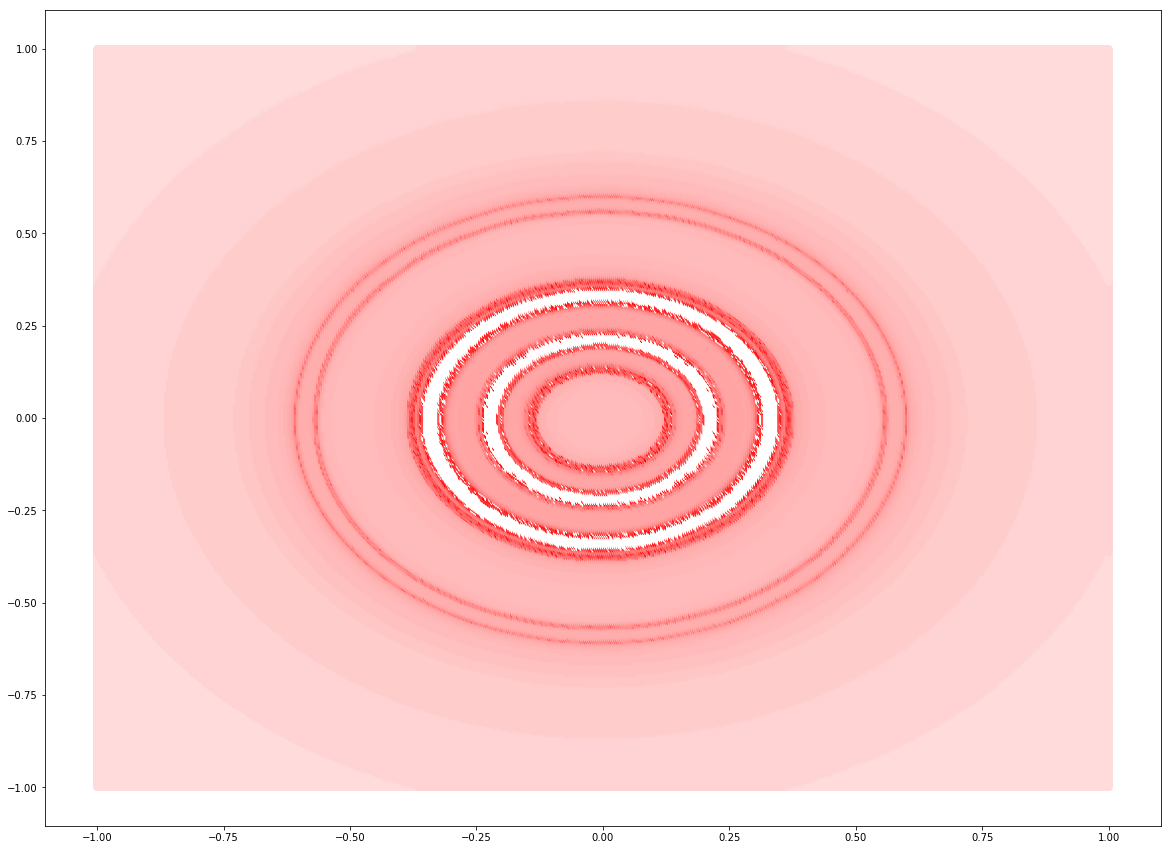

Loaded in 65.33188 seconds
Real =  0.3999999999999999


In [94]:
for i in [11, 12, 13, 18, 19, 20, 23, 24]:
    t = time()
    rj = rijk([-2+i/10,-2+i/10,1],[-1,1,500],[-1,1,500],[0])
    print("Rijk generated in",round(time()-t,5),"seconds")
    t = time()
    itrs = mandelbrot(rj, 100)
    print("Checked all points in",round(time()-t,5),"seconds")
    #plt.scatter(*plotRijk(rijk2, [0]), c=a)
    fig = plt.figure(figsize=[20,15])
    ax = fig.gca()
    t=time()
    x,y = plotRijk(rj, [0], 'ij')
    c = colourmap(itrs,[1,1,1])
    print("Colourmap generated in",round(time()-t,5),"seconds")
    t=time()
    ax.scatter(x,y,c=c)
    print("Drawn in",round(time()-t,5),"seconds")
    print("Estimated load time:",round((time()-t)*5,5),"seconds")
    t=time()
    plt.show()
    print("Loaded in",round(time()-t,5),"seconds")
    plt.close(fig)
    print("Real = ", -2+i/10)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [18]:
third = fastrijk()

In [8]:
%matplotlib inline

In [19]:
itrs = mandelbrot(third, 100)
print("Brotted")
x,y,z = plotRijk(third, [0], 'rij')
print("Plotted")
x,y,z = np.swapaxes(np.array([[x[i],y[i],z[i]] for i in range(len(itrs)) if itrs[i] == 0]),0,1)
print("meh")
fig = plt.figure(figsize=[20,15])
ax = fig.gca(projection='3d')

Brotted
Plotted
meh


ValueError: RGBA values should be within 0-1 range

In [16]:
# Stats hw: Exercise 4c Q1,2,3
fig2  = plt.figure(figsize=[20,10])
ax = fig2.gca()
ax.scatter([0,1,2,3,0,0],[0,1,2,3,1,2],s=100)
plt.savefig('henlo.png', bbox_inches="tight")
plt.close(fig2)

In [23]:
ax.scatter(-x,y,z,c=[(1,i/2+.5,-i/2+.5) for i in y])
print("Henloo")
plt.savefig('QuatBrot.png')
plt.close(fig)
print("And dotted")

Henloo
And dotted
